<a href="https://colab.research.google.com/github/Hiroto-4431/AI-DataScience/blob/main/multivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 単変量解析

## 相関分析

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = 10, 6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI-DataScience/auto-mpg.csv')
df.head(3)

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   
2  18.0          8         318.0       150.0  3436.0          11.0    70   

    Origin  
0  America  
1  America  
2  America

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Year          392 non-null    int64  
 7   Origin        392 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 24.6+ KB


In [ ]:
df.describe()

MPG   Cylinders  Displacement  Horsepower       Weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration        Year  
count    392.000000  392.000000  
mean      15.541327   75.979592  
std        2.758864    3.683737  
min        8.000000   70.000000  
25%       13.775000   73.000000  
50%       15.500000   76.000000  
75%       17.025000   79.000000  
max       24.800000   82.000000

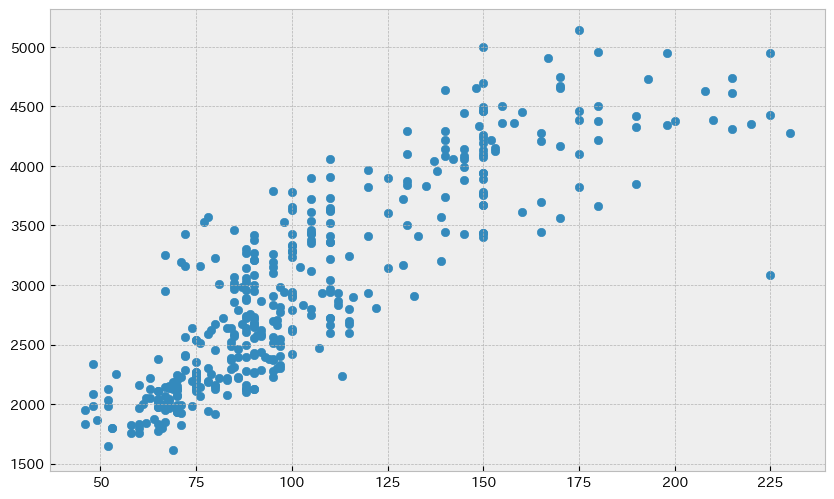

In [ ]:
# 散布図
plt.scatter(df['Horsepower'], df['Weight'])

In [ ]:
df[['Horsepower', 'Weight']].corr() # corr : correlation : 相関

Horsepower    Weight
Horsepower    1.000000  0.864538
Weight        0.864538  1.000000

In [ ]:
_df = df[['Horsepower', 'Weight']].drop(df.index[(df['Horsepower']==225.0) & (df['Weight']==3086.0)])

In [ ]:
len(df)

392

In [ ]:
len(_df)

391

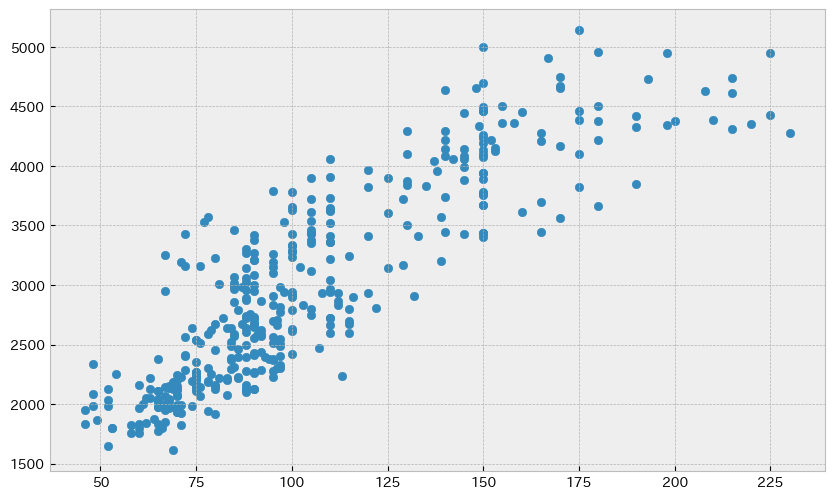

In [ ]:
# 散布図
plt.scatter(_df['Horsepower'], _df['Weight'])

In [ ]:
_df.corr()

Horsepower    Weight
Horsepower    1.000000  0.874596
Weight        0.874596  1.000000

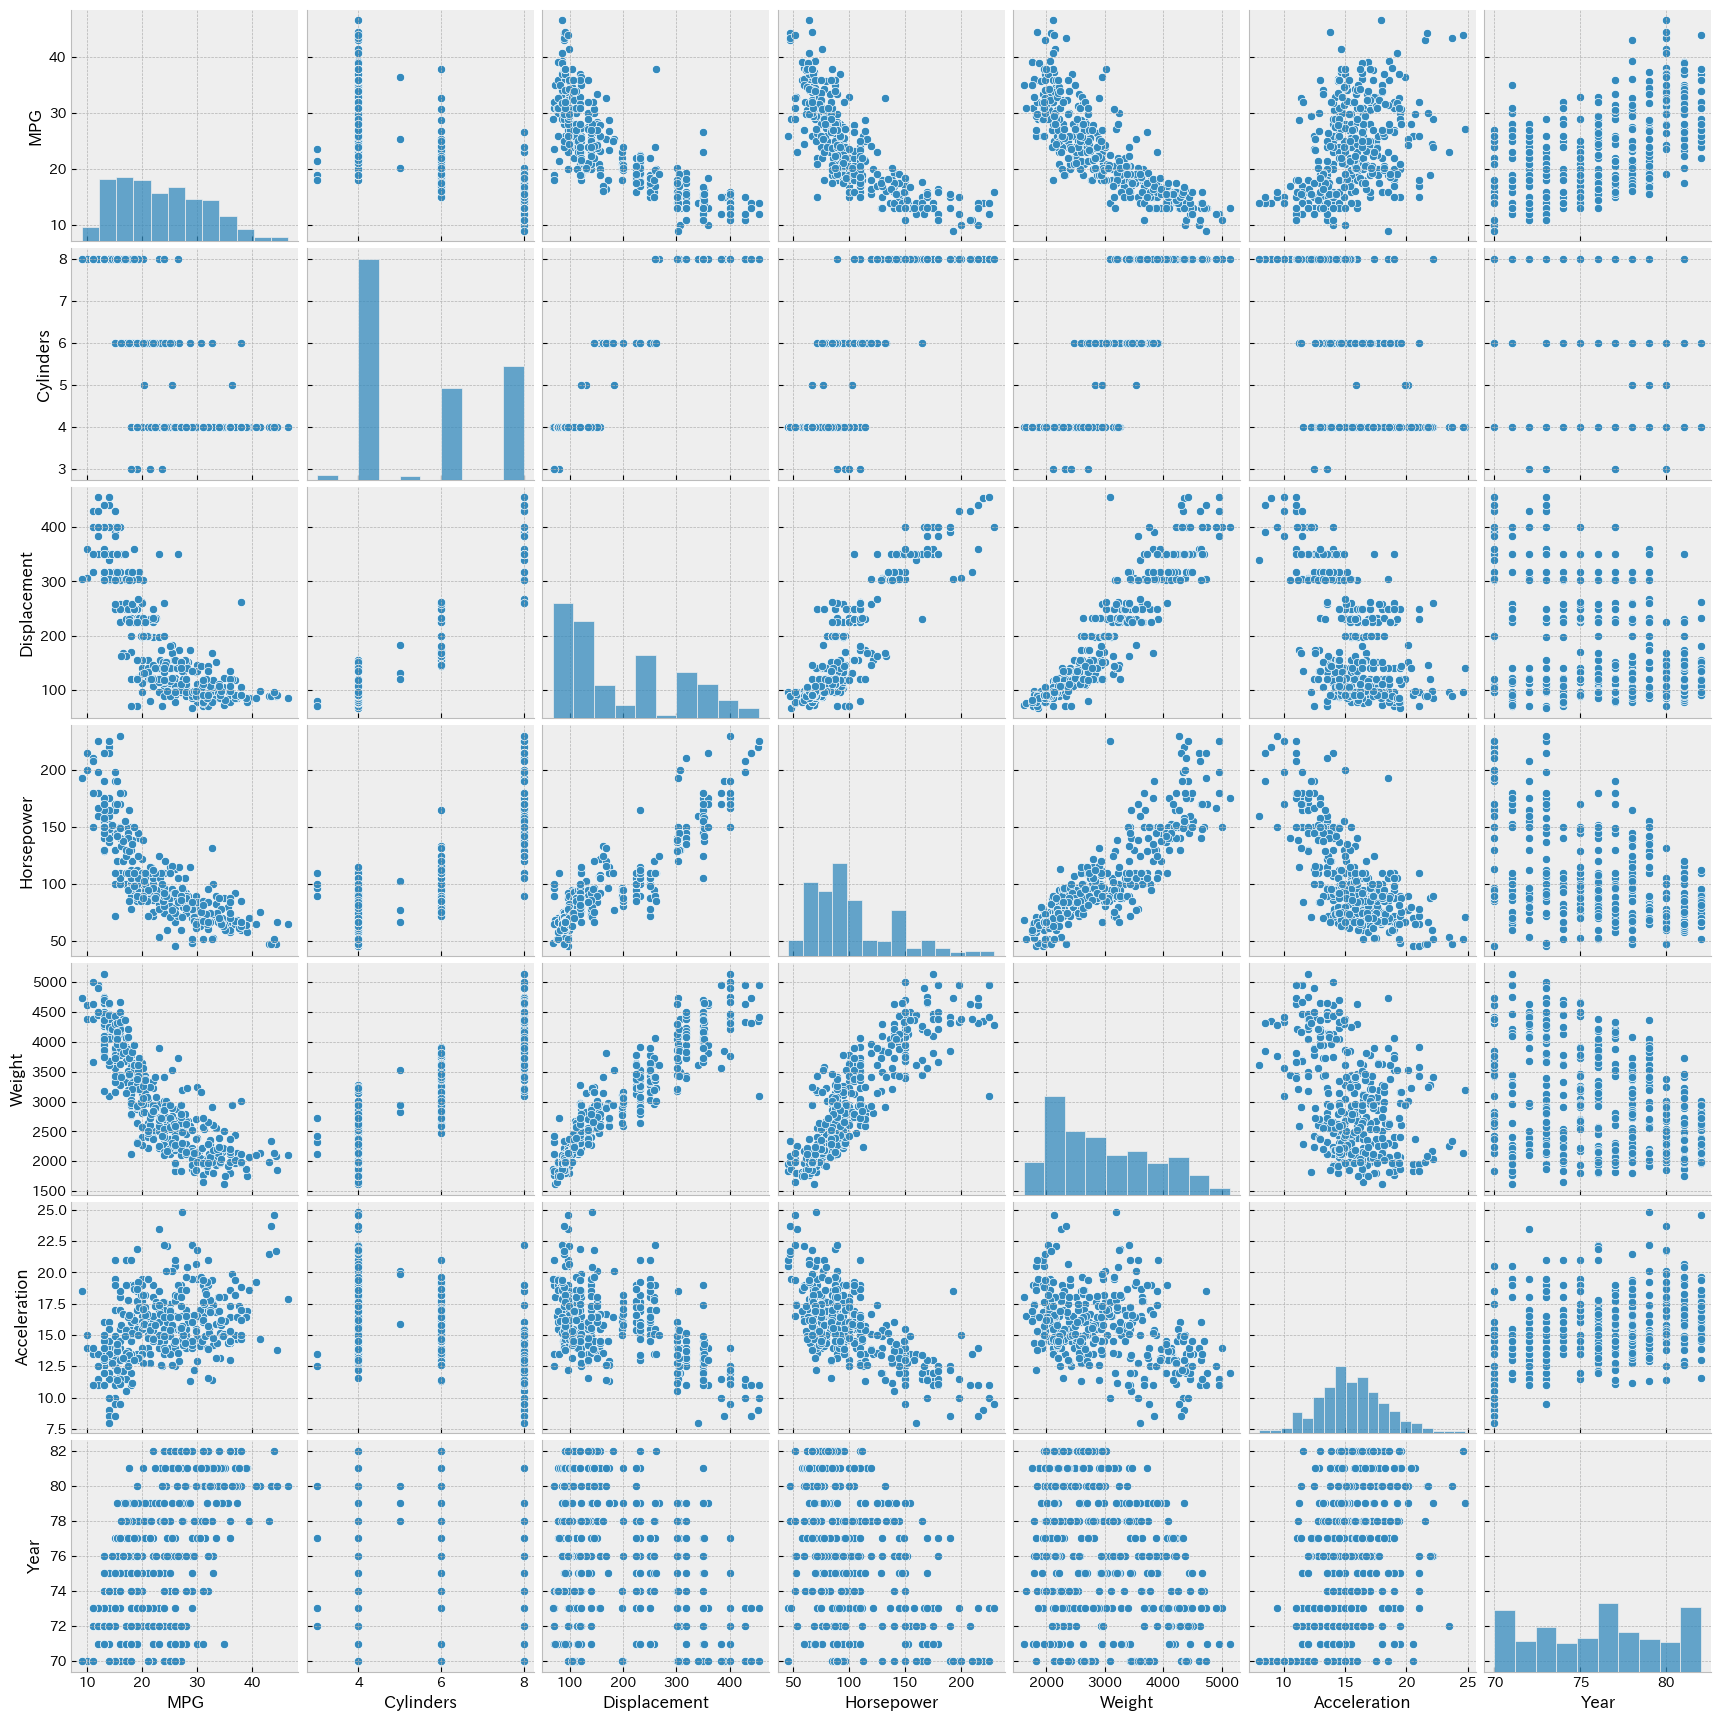

In [ ]:
# 散布図
sns.pairplot(df);

In [ ]:
# 相関係数
df.corr()

MPG  Cylinders  Displacement  Horsepower    Weight  \
MPG           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
Cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
Displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
Horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
Weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
Acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
Year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              Acceleration      Year  
MPG               0.423329  0.580541  
Cylinders        -0.504683 -0.345647  
Displacement     -0.543800 -0.369855  
Horsepower       -0.689196 -0.416361  
Weight           -0.416839 -0.309120  
Acceleration      1.000000  0.290316  
Year              0.290316  1.000000

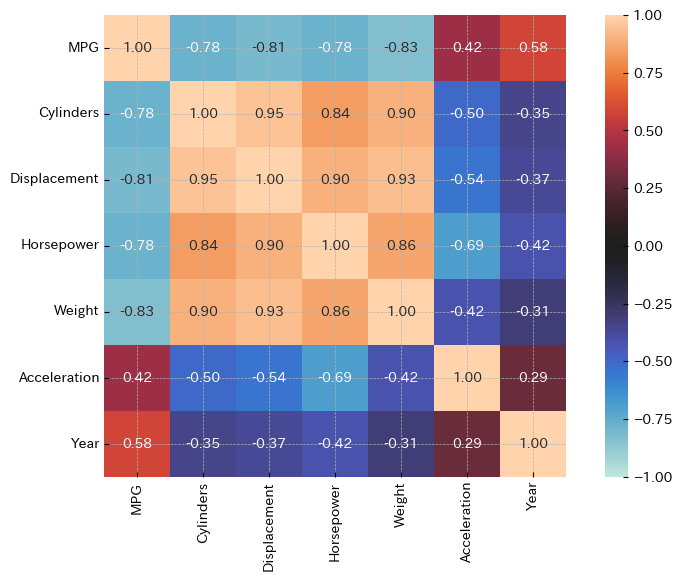

In [ ]:
# ヒートマップ
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

## 単回帰分析

In [ ]:
import statsmodels.api as sm

In [ ]:
# 目的変数と説明変数の取得
y = df['MPG']
x = df['Weight']

In [ ]:
# 裏側で動く乱数の固定
np.random.seed(0)

In [ ]:
# sm.add_constant(x)

In [ ]:
# PLSクラス
simple_ols = sm.OLS(y, sm.add_constant(x)) # モデルのインスタンス化

In [ ]:
# 分析の実行
result = simple_ols.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          6.02e-102
Time:                        06:22:26   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
Weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-squared : 決定係数。モデル精度を確認。最大1。
- Adj R-squared : 自由度調整済み決定係数。
- const : 切片の値。
- weight : 回帰係数の値。

In [ ]:
# 決定係数
result.rsquared

0.6926304331206254

In [ ]:
# 係数
result.params

const     46.216525
Weight    -0.007647
dtype: float64

- P値が算出されている。
- 帰無仮説 : a = 0
- 対立仮説 : a ≠ 0 何かしらの関係がある。

In [ ]:
result.pvalues

const     1.623069e-193
Weight    6.015296e-102
dtype: float64

In [ ]:
# 予測
pred = result.predict()
pred[:3]

array([19.4202363 , 17.97488856, 19.9402556 ])

In [ ]:
# 目標値
df['MPG'][:3]

0    18.0
1    15.0
2    18.0
Name: MPG, dtype: float64

# 多変量解析

## 重回帰分析

In [ ]:
df.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   
2  18.0          8         318.0       150.0  3436.0          11.0    70   
3  16.0          8         304.0       150.0  3433.0          12.0    70   
4  17.0          8         302.0       140.0  3449.0          10.5    70   

    Origin  
0  America  
1  America  
2  America  
3  America  
4  America

In [ ]:
# 標準化 : 平均値を0, 標準偏差 : 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # インスタンス化

In [ ]:
# 説明変数
x = df.drop(['MPG', 'Origin'], axis=1)
x.head()

Cylinders  Displacement  Horsepower  Weight  Acceleration  Year
0          8         307.0       130.0  3504.0          12.0    70
1          8         350.0       165.0  3693.0          11.5    70
2          8         318.0       150.0  3436.0          11.0    70
3          8         304.0       150.0  3433.0          12.0    70
4          8         302.0       140.0  3449.0          10.5    70

In [ ]:
# 目的変数
y = df['MPG']

In [ ]:
# 標準化
x_scaled = scaler.fit_transform(x) # numpy.ndarray

In [ ]:
# インスタンス化
multi_ols = sm.OLS(y, sm.add_constant(x_scaled))

In [ ]:
# 分析の実行
result = multi_ols.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          3.79e-135
Time:                        06:39:59   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4459      0.174    135.130      0.000      23.105      23.787
x1            -0.5619      0.566     -0.993      0.321      -1.674       0.550
x2             0.8025      0.769      1.044      0.297      -0.709       2.314
x3            -0.0150      0.532     -0.028      0.977      -1.061       1.031
x4            -5.7640      0.568    -10.141      0.000      -6.882      -4.646
x5             0.2350      0.281      0.836      0.404      -0.318       0.788
x6             2.7717      0.194     14.318      0.000       2.391       3.152
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 自由度調整済み決定係数
result.rsquared_adj

0.8062826441922383

In [ ]:
# 偏回帰係数
result.params

const    23.445918
x1       -0.561950
x2        0.802476
x3       -0.015045
x4       -5.764000
x5        0.234957
x6        2.771664
dtype: float64

- 帰無仮説 : a=0
- 対立仮説 : a≠0

In [ ]:
# P値
result.pvalues

const    0.000000e+00
x1       3.212169e-01
x2       2.973318e-01
x3       9.774501e-01
x4       1.416190e-21
x5       4.038303e-01
x6       1.410428e-37
dtype: float64

In [ ]:
# t値
result.tvalues

const    135.130285
x1        -0.993240
x2         1.043586
x3        -0.028284
x4       -10.140877
x5         0.835721
x6        14.317630
dtype: float64

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = 10, 6

In [ ]:
# データの読み込み
df = pd.read_csv('/content/drive/MyDrive/AI-DataScience/hotel_reviews.csv')
df.head(3)

性別  年齢 個人/グループ 旅行の目的  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  \
0  女性  50    グループ    学生       4       4             4       4       3   
1  女性  35      個人  ビジネス       4       5             4       4       1   
2  女性  22    グループ   その他       1       1             1       4       1   

   滞在時の快適さ  チェックイン・アウトの接客  その他のサービス  清潔さ  満足度  
0        4              4         4    4    4  
1        1              5         4    1    2  
2        5              1         3    1    3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   性別             10000 non-null  object
 1   年齢             10000 non-null  int64 
 2   個人/グループ        10000 non-null  object
 3   旅行の目的          10000 non-null  object
 4   Wifi設備         10000 non-null  int64 
 5   送迎の便利さ         10000 non-null  int64 
 6   オンライン予約のしやすさ   10000 non-null  int64 
 7   ホテルの立地         10000 non-null  int64 
 8   食事の満足度         10000 non-null  int64 
 9   滞在時の快適さ        10000 non-null  int64 
 10  チェックイン・アウトの接客  10000 non-null  int64 
 11  その他のサービス       10000 non-null  int64 
 12  清潔さ            10000 non-null  int64 
 13  満足度            10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


## カテゴリカル変数の取り扱い
- Label Encoding
  - 男性 -> 0
  - 女性 -> 1
  - その他 -> 2
- One Hot Encoding
  - 男性 -> 1,0,0
  - 女性 -> 0,1,0
  - その他 -> 0,0,1

In [ ]:
df.select_dtypes(include='object')

性別 個人/グループ 旅行の目的
0     女性    グループ    学生
1     女性      個人  ビジネス
2     女性    グループ   その他
3     男性      個人  航空関係
4     男性    グループ  航空関係
...   ..     ...   ...
9995  女性    グループ    学生
9996  男性      個人    学生
9997  男性    グループ    学生
9998  女性    グループ    旅行
9999  男性      個人    学生

[10000 rows x 3 columns]

### One Hot Encoding

In [ ]:
# 数値化
_df = pd.get_dummies(df, drop_first=True)

## 相関分析

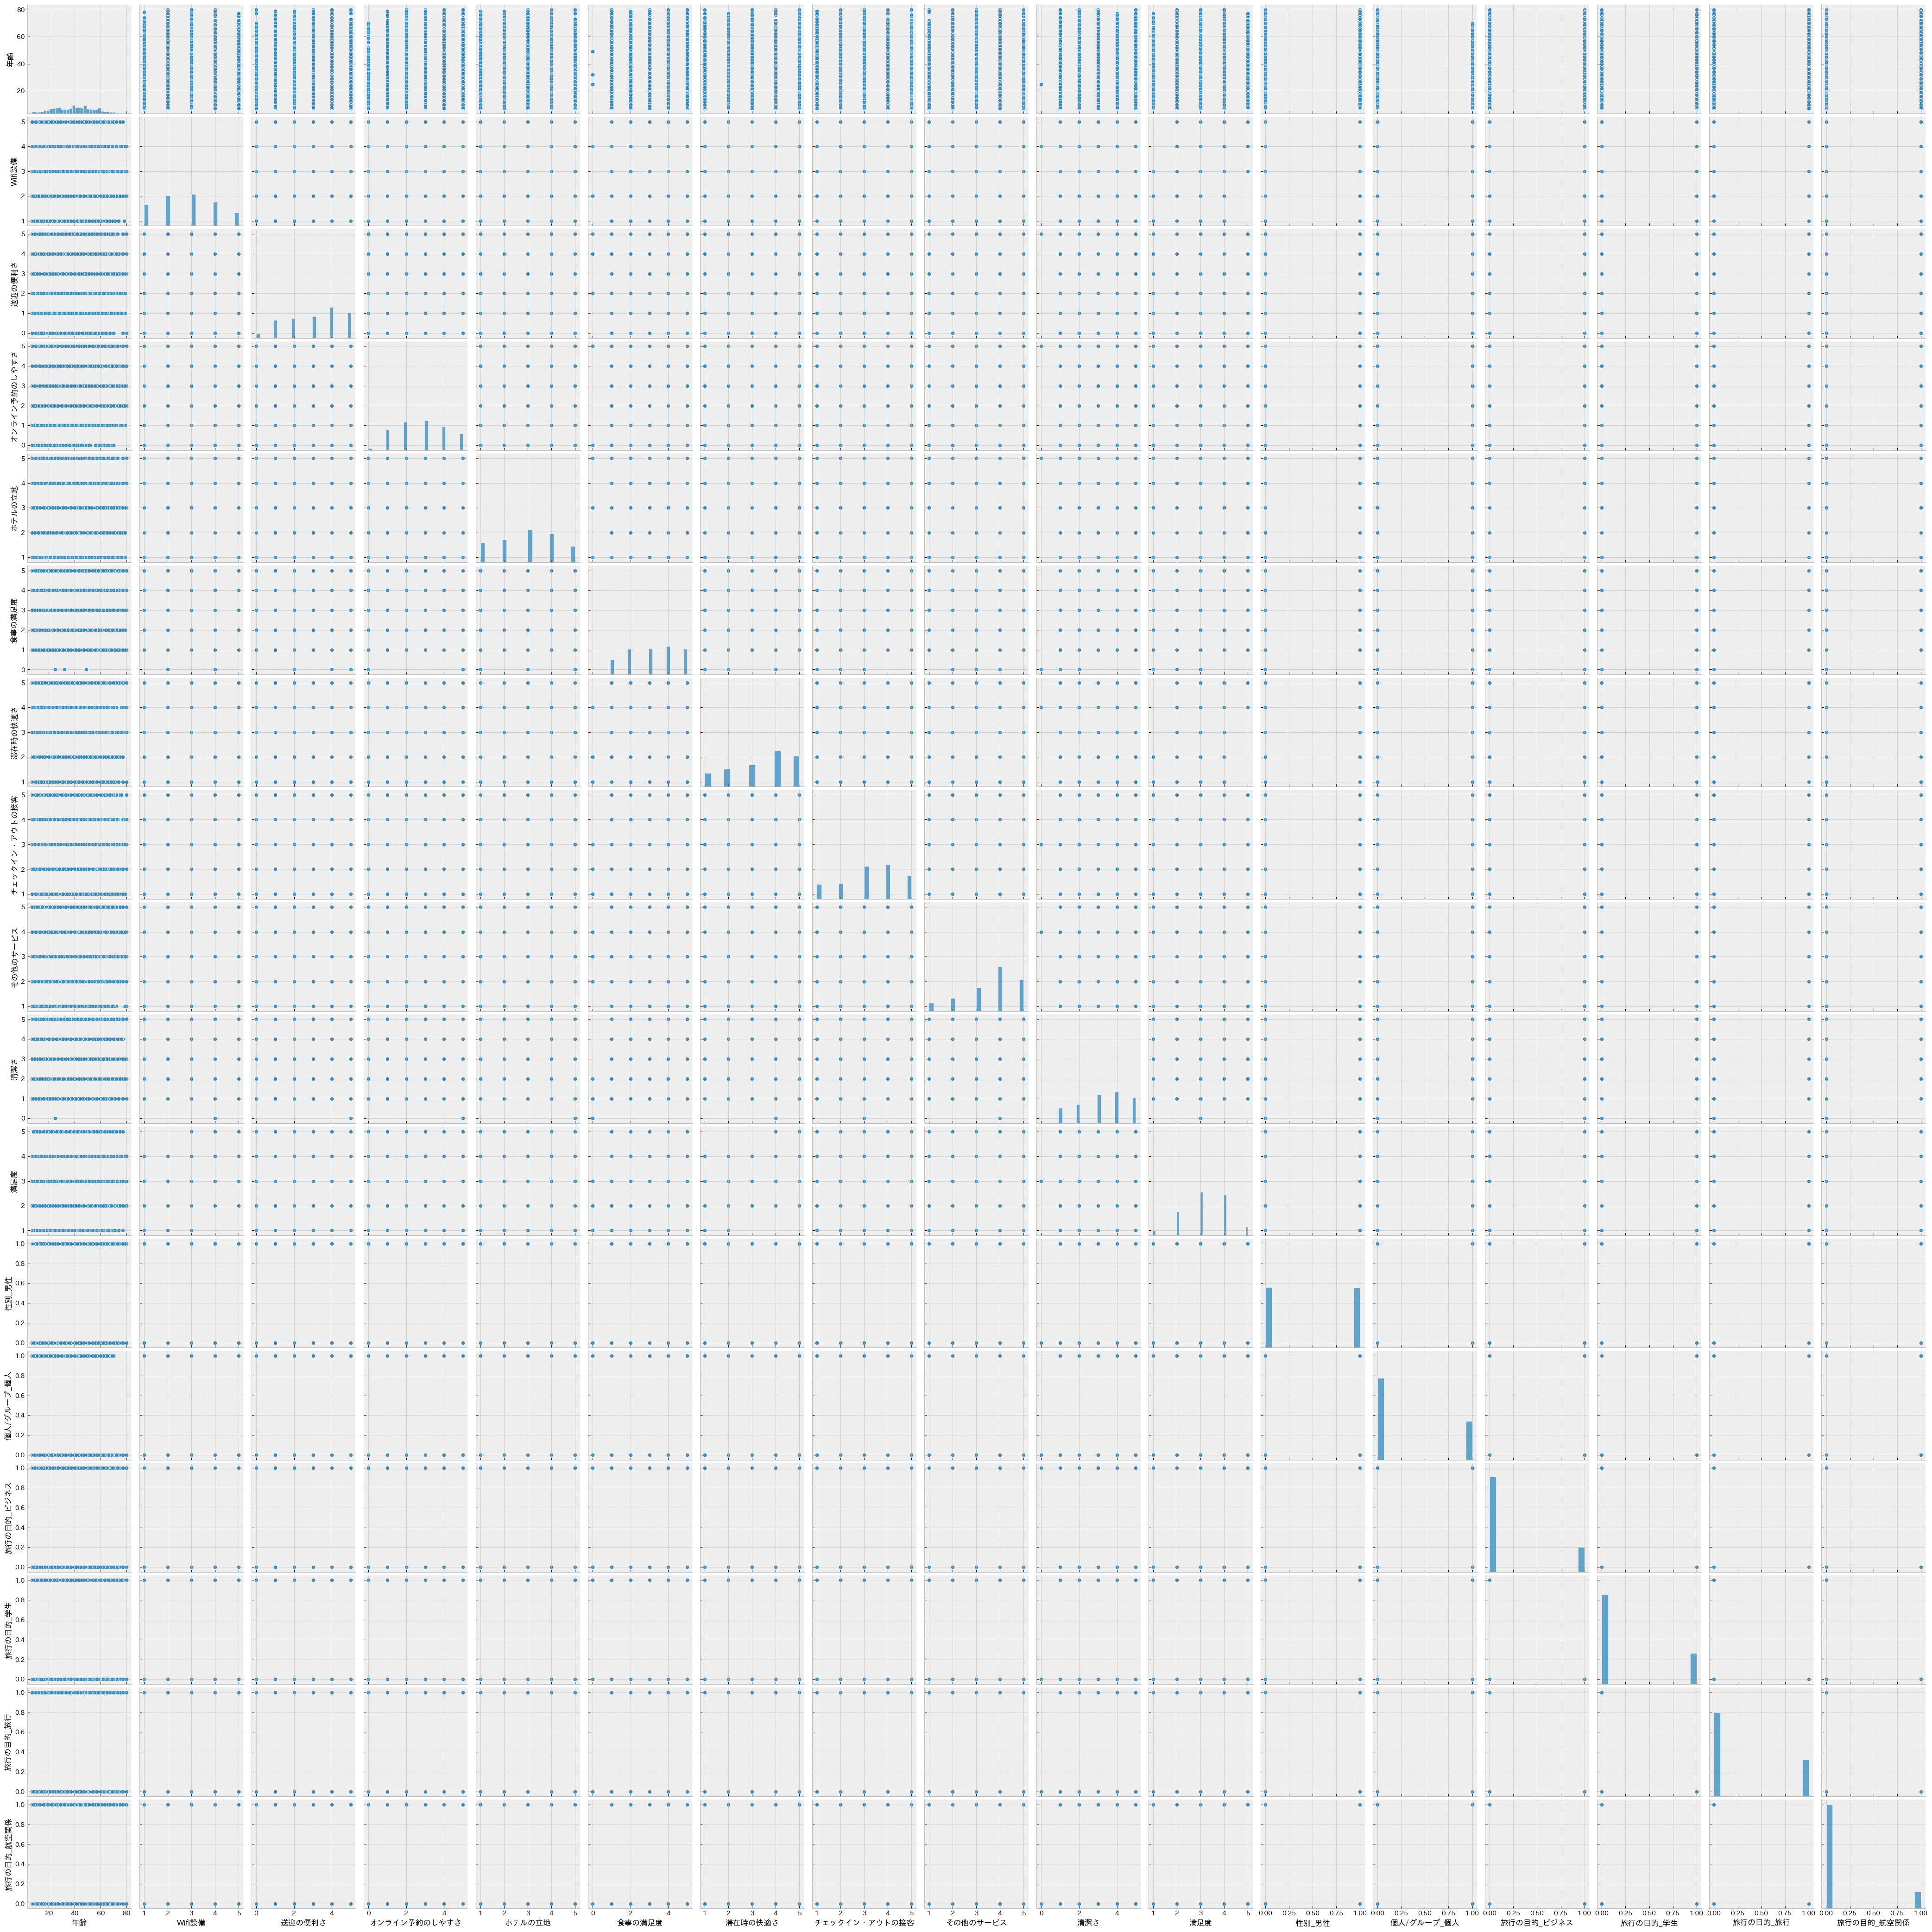

In [ ]:
sns.pairplot(_df)

<Axes: >

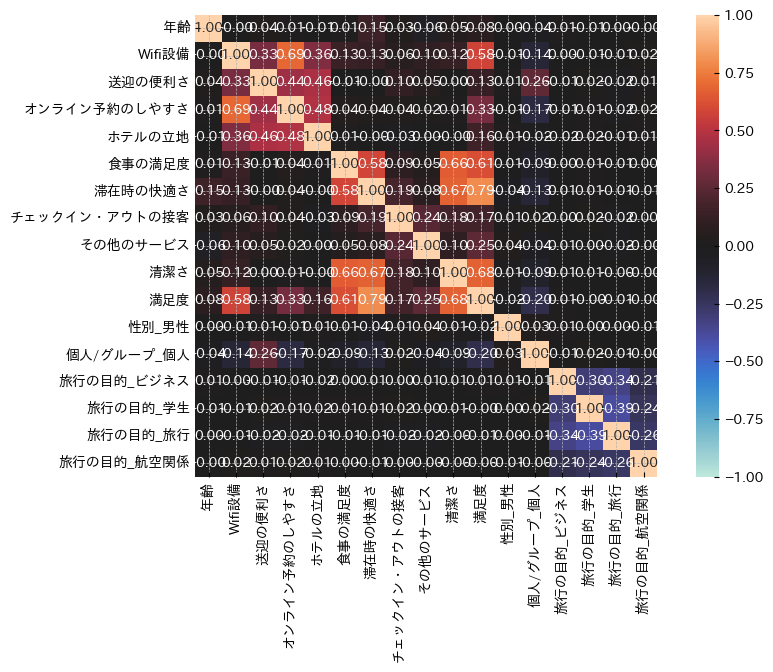

In [ ]:
# 相関係数
sns.heatmap(_df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f')

## 重回帰分析

In [ ]:
# データの分割
x = _df.drop('満足度', axis=1)
y = _df['満足度']

In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
feature = pd.DataFrame(x_scaled, columns=_df.drop('満足度', axis=1).columns)

In [ ]:
feature.head()

年齢    Wifi設備    送迎の便利さ  オンライン予約のしやすさ    ホテルの立地    食事の満足度   滞在時の快適さ  \
0  0.692808  0.949620  0.604184      0.870686  0.793117 -0.151073  0.426398   
1 -0.295675  0.949620  1.278798      0.870686  0.793117 -1.658784 -1.852588   
2 -1.152360 -1.452454 -1.419657     -1.383031  0.793117 -1.658784  1.186060   
3 -0.625169  0.148929  0.604184      0.119447  0.793117  1.356638 -1.852588   
4  1.285898  0.949620 -0.070430      0.119447  0.008552  0.602783  0.426398   

   チェックイン・アウトの接客  その他のサービス       清潔さ     性別_男性  個人/グループ_個人  旅行の目的_ビジネス  \
0       0.559565  0.302711  0.548147 -0.993819   -0.686310   -0.512160   
1       1.352038  0.302711 -1.741841 -0.993819    1.457068    1.952516   
2      -1.817854 -0.552888 -1.741841 -0.993819   -0.686310   -0.512160   
3       0.559565  0.302711  1.311476  1.006219    1.457068   -0.512160   
4      -0.232908  1.158311  0.548147  1.006219   -0.686310   -0.512160   

   旅行の目的_学生  旅行の目的_旅行  旅行の目的_航空関係  
0  1.698974 -0.661051   -0.400788  
1 -0.588590 -0.661051   -0.400788  
2 -0.588590 -0.661051   -0.400788  
3 -0.588590 -0.661051    2.495082  
4 -0.588590 -0.661051    2.495082

In [ ]:
# 分析の実行
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [ ]:
# 分析結果
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    満足度   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     6930.
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        07:11:11   Log-Likelihood:                -1386.0
No. Observations:               10000   AIC:                             2806.
Df Residuals:                    9983   BIC:                             2929.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2019      0.003   1151.022      0.000       3.196       3.207
年齢               -0.0036      0.003     -1.271      0.204      -0.009       0.002
Wifi設備            0.4633      0.004    117.969      0.000       0.456       0.471
送迎の便利さ           -0.0154      0.004     -4.333      0.000      -0.022      -0.008
オンライン予約のしやすさ     -0.0345      0.004     -8.011      0.000      -0.043      -0.026
ホテルの立地            0.0117      0.003      3.464      0.001       0.005       0.018
食事の満足度            0.1147      0.004     29.853      0.000       0.107       0.122
滞在時の快適さ           0.5276      0.004    132.126      0.000       0.520       0.535
チェックイン・アウトの接客    -0.0299      0.003    -10.165      0.000      -0.036      -0.024
その他のサービス          0.1433      0.003     49.432      0.000       0.138       0.149
清潔さ               0.1590      0.004     37.565      0.000       0.151       0.167
性別_男性             0.0007      0.003      0.252      0.801      -0.005       0.006
個人/グループ_個人       -0.0247      0.003     -7.986      0.000      -0.031      -0.019
旅行の目的_ビジネス        0.0008      0.004      0.188      0.851      -0.008       0.010
旅行の目的_学生         -0.0039      0.005     -0.839      0.402      -0.013       0.005
旅行の目的_旅行          0.0024      0.005      0.489      0.625      -0.007       0.012
旅行の目的_航空関係       -0.0053      0.004     -1.290      0.197      -0.013       0.003
==============================================================================
Omnibus:                     3087.589   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.976
Skew:                           0.044   Prob(JB):                    6.52e-102
Kurtosis:                       1.946   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 自由度調整済み決定係数
result.rsquared_adj


0.917274893983254

In [ ]:
# 説明変数と t, p値, 標準回帰係数のデータフレームを作成
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]], index=['t', 'p', 'coef']).T

In [ ]:
res_values

t              p      coef
年齢              -1.270955   2.037742e-01 -0.003611
Wifi設備         117.969420   0.000000e+00  0.463290
送迎の便利さ          -4.332754   1.486964e-05 -0.015414
オンライン予約のしやすさ    -8.011477   1.260010e-15 -0.034454
ホテルの立地           3.464405   5.336381e-04  0.011694
食事の満足度          29.853107  1.196351e-187  0.114661
滞在時の快適さ        132.125668   0.000000e+00  0.527593
チェックイン・アウトの接客  -10.164707   3.735465e-24 -0.029936
その他のサービス        49.432387   0.000000e+00  0.143318
清潔さ             37.565036  5.530474e-289  0.159023
性別_男性            0.251510   8.014252e-01  0.000702
個人/グループ_個人      -7.985699   1.551319e-15 -0.024688
旅行の目的_ビジネス       0.188357   8.506008e-01  0.000841
旅行の目的_学生        -0.838676   4.016710e-01 -0.003914
旅行の目的_旅行         0.488946   6.248906e-01  0.002352
旅行の目的_航空関係      -1.289754   1.971660e-01 -0.005266

- t値の絶対値が2以上。
- p値が5%以下。

In [ ]:
# t値の絶対値が2以上、p値が5%以下
res_values[(res_values['t'].abs()>=2.0) & (res_values['p']<0.05)].sort_values('t', ascending=False)

t              p      coef
滞在時の快適さ        132.125668   0.000000e+00  0.527593
Wifi設備         117.969420   0.000000e+00  0.463290
その他のサービス        49.432387   0.000000e+00  0.143318
清潔さ             37.565036  5.530474e-289  0.159023
食事の満足度          29.853107  1.196351e-187  0.114661
ホテルの立地           3.464405   5.336381e-04  0.011694
送迎の便利さ          -4.332754   1.486964e-05 -0.015414
個人/グループ_個人      -7.985699   1.551319e-15 -0.024688
オンライン予約のしやすさ    -8.011477   1.260010e-15 -0.034454
チェックイン・アウトの接客  -10.164707   3.735465e-24 -0.029936

In [ ]:
# 相関係数
tmp = df.corr()['満足度']
tmp[tmp.abs()>0.5].sort_values(ascending=False)

満足度        1.000000
滞在時の快適さ    0.793672
清潔さ        0.678053
食事の満足度     0.612857
Wifi設備     0.575273
Name: 満足度, dtype: float64

- 滞在時の快適さ
- WIfi設備
- 清潔さ
- 食事の満足度

## 主成分分析

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = 10, 6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# データの読み込み
df = pd.read_csv('/content/drive/MyDrive/AI-DataScience/academic_ability.csv')
df.head(3)

現代文  古文  数学  化学  生物  物理  歴史  世界史  政治経済  英語
0    2   3   4   3   3   4   3    2     3   2
1    5   4   3   3   3   2   4    3     4   5
2    3   3   3   4   3   4   3    4     4   3

In [ ]:
df.shape

(40, 10)

In [ ]:
df.describe()

現代文         古文         数学         化学         生物         物理  \
count  40.000000  40.000000  40.000000  40.000000  40.000000  40.000000   
mean    3.450000   3.400000   3.400000   3.375000   3.350000   3.325000   
std     1.197219   1.172331   1.215287   1.102154   1.098951   1.288758   
min     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
25%     3.000000   3.000000   2.750000   3.000000   3.000000   2.000000   
50%     3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   
75%     5.000000   4.250000   4.250000   4.000000   4.000000   4.000000   
max     5.000000   5.000000   5.000000   5.000000   5.000000   5.000000   

              歴史        世界史       政治経済         英語  
count  40.000000  40.000000  40.000000  40.000000  
mean    3.450000   3.475000   3.550000   3.525000  
std     0.985797   1.085747   1.060962   1.320208  
min     1.000000   1.000000   1.000000   1.000000  
25%     3.000000   3.000000   3.000000   3.000000  
50%     3.000000   3.000000   3.000000   3.000000  
75%     4.000000   4.000000   4.000000   5.000000  
max     5.000000   5.000000   5.000000   5.000000

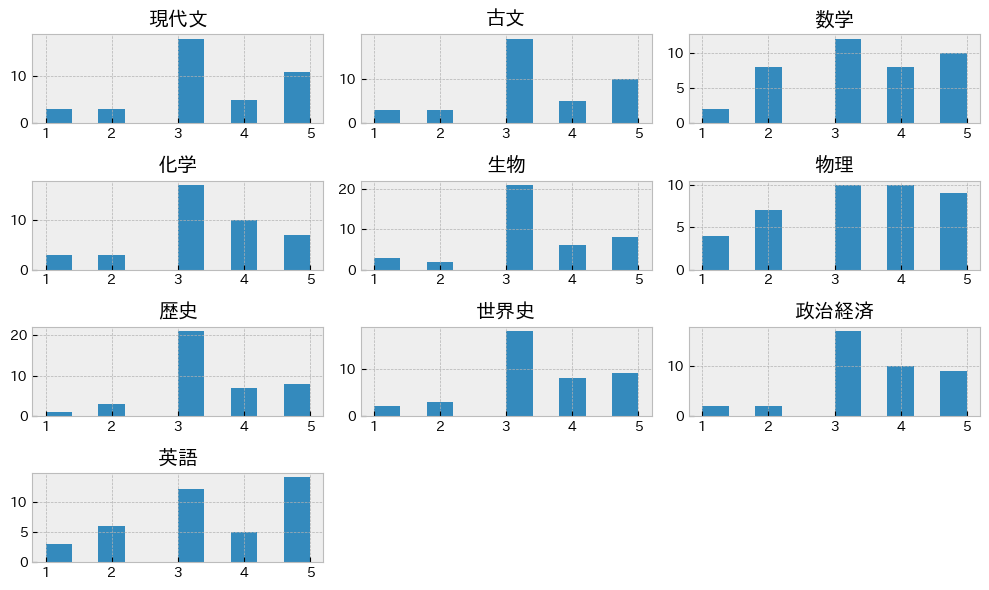

In [ ]:
df.hist()
plt.tight_layout();

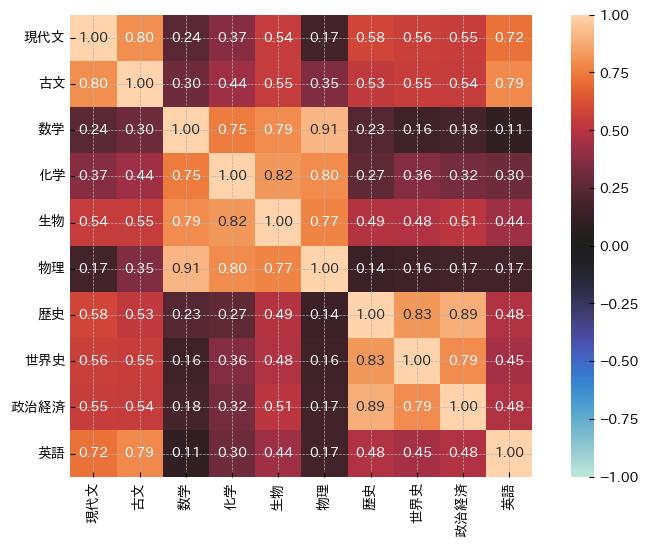

In [ ]:
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

### 主成分分析の実行

In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df)

In [ ]:
# DataFrame に格納
df_scaled = pd.DataFrame(scaled_values, columns=df.columns)
df_scaled.head()

現代文        古文        数学        化学        生物        物理        歴史  \
0 -1.226569 -0.345547  0.500000 -0.344577 -0.322543  0.530432 -0.462299   
1  1.311160  0.518321 -0.333333 -0.344577 -0.322543 -1.041219  0.565032   
2 -0.380659 -0.345547 -0.333333  0.574295 -0.322543  0.530432 -0.462299   
3  1.311160  1.382189 -0.333333 -0.344577 -0.322543 -0.255393  0.565032   
4  0.465250 -0.345547  0.500000  1.493168  0.599008 -0.255393 -0.462299   

        世界史      政治経済        英語  
0 -1.375819 -0.525001 -1.169837  
1 -0.443060  0.429547  1.131481  
2  0.489698  0.429547 -0.402731  
3  0.489698  0.429547  1.131481  
4 -0.443060  0.429547 -0.402731

In [ ]:
# 主成分分析のクラス（PCA）のインスタンス化
from sklearn.decomposition import PCA
pca = PCA(random_state=0)

In [ ]:
# 主成分分析の実績
feature = pca.fit_transform(df_scaled)

In [ ]:
# サイズの確認
feature.shape

(40, 10)

In [ ]:
# DataFrameにfeatureを格納
pd.DataFrame(feature, columns=[f'PC{x+1}' for x in range(len(df.columns))]) # リスト内包表記

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   1.582937  1.522060  0.319377 -0.680331 -0.471073  0.310012 -0.562323   
1  -0.537827 -1.654101 -1.080071 -0.613575  0.194434 -0.690422 -0.164876   
2   0.107779  0.336046  0.608438  0.895810 -0.093421  0.212990 -0.346491   
3  -1.339368 -1.645856 -1.095151 -0.272281  0.063357  0.447164 -0.099699   
4  -0.518339  0.969427  0.078046  0.495261  0.818791 -1.029864 -0.726044   
5   0.564635 -0.418790  0.663458 -0.385418 -0.290117 -0.250100 -0.388987   
6  -0.460786  0.508158 -0.439562  0.537366 -0.660517 -0.273038 -0.703115   
7  -3.835256  0.121999 -0.216560  0.694654  0.035814  0.034170 -0.277471   
8   4.390589 -1.246005  0.686091  0.758606  0.564110  0.415885 -0.737896   
9  -1.065841  2.118970 -0.644981 -0.158837 -0.839369 -0.701330  0.926465   
10  0.889651  2.129607  0.070722 -0.872122  0.322246  1.151169  0.546345   
11  0.025867 -1.621853 -2.282775  0.159969  0.447960 -0.011235 -0.283828   
12  0.622551  0.212782  0.233435  0.999670  0.391995  0.202448  0.216941   
13  1.706311 -0.694911 -0.213422  0.539617 -0.079305 -1.038511  0.507825   
14 -4.388393  0.222410  0.257426 -0.031447 -0.035565  0.083752  0.050334   
15  3.576488 -1.474024  0.873152 -0.712548  0.652200 -0.521904  0.535041   
16 -1.420980 -1.955178  0.971776  0.169775 -1.196853  0.313671  0.330790   
17 -0.463714 -1.088425 -0.774399 -0.442672 -0.613977 -0.329558 -0.145521   
18 -1.553383  2.426965  0.204167  0.343574  1.237796  0.542310 -0.152289   
19  0.654889 -2.179325 -2.326186 -0.391426  0.203519  0.566838 -0.192269   
20 -0.925156  2.218698  0.500863 -0.386387 -0.261032 -0.472860 -0.252272   
21  2.636967  4.381584  0.673638  0.674273  0.220517  0.059285  0.553451   
22 -0.003841 -3.058499  1.060161 -0.478368  1.380285 -0.094475  0.635866   
23 -3.671027 -0.306670  0.636835 -0.657225  0.457361  0.292668 -0.057794   
24  0.622551  0.212782  0.233435  0.999670  0.391995  0.202448  0.216941   
25 -0.138107 -0.727697 -1.269916  0.562535 -0.730374  0.963154  0.327847   
26  0.033115 -2.062868  2.331501  0.656734 -0.669792  0.058794 -0.061698   
27  0.556041  0.732243 -0.418502 -0.329834 -0.554224  0.129495  0.453384   
28  5.939515 -0.112436  0.369138 -0.722461 -0.159525 -0.215381 -0.292542   
29 -4.388393  0.222410  0.257426 -0.031447 -0.035565  0.083752  0.050334   
30  0.224345  1.537394 -0.713726 -0.176150 -0.481973 -0.846855 -0.057931   
31  1.206797  0.134859 -0.107399  0.014838  0.063478  0.024112 -0.004338   
32 -2.167313  1.593197 -2.002771  0.009369  0.239127  0.193758 -0.126798   
33 -0.769683  0.733752  0.486954 -0.481008  0.324787 -0.614727 -0.352972   
34  0.605647 -1.432283 -0.923409  0.795041  0.183527 -0.490741  0.862347   
35 -0.672181 -1.467798  2.111586  0.009748 -0.299330  0.272240  0.065876   
36  0.443649  1.717902  0.471684 -0.918955  0.394444  0.323625  0.094019   
37 -0.467774 -0.149299  1.447601 -0.474896 -0.571792  0.253077 -0.381547   
38 -3.675727 -0.880517  0.177096 -0.188863  0.011309 -0.030644  0.099789   
39  6.072762  0.123290 -1.215174  0.089740 -0.555250  0.474830 -0.104890   

         PC8       PC9      PC10  
0   0.062166 -0.312301 -0.076888  
1   0.479087 -0.037316  0.212635  
2   0.051084  0.624242 -0.164918  
3   0.211740  0.128337 -0.032590  
4   0.225064 -0.002689  0.476964  
5   0.242385 -0.194095 -0.219777  
6  -0.449270 -0.107411 -0.225494  
7  -0.366041  0.413349 -0.233640  
8  -0.122621  0.277852  0.174179  
9  -0.497933  0.068095  0.088533  
10  0.257795  0.172734 -0.221057  
11 -0.104212 -0.310061 -0.086158  
12  0.149525 -0.052555  0.111026  
13 -0.063506 -0.002980 -0.127142  
14  0.222553 -0.012652 -0.036165  
15 -0.308895  0.435492  0.062129  
16  0.275642 -0.054948  0.182457  
17  0.391778 -0.021017 -0.092233  
18 -0.496401 -0.256731 -0.100550  
19  0.126897  0.160596 -0.023029  
20 -0.765104  0.219266  0.075717  
21  0.861810 -0.247289 -0.058329  
22 -0.044376 -0.215554 -0.264033  
23 -0.282975 -0.275423  0.275750  
24  0.149525 -0.0

### 結果の解釈
- 寄与率・累積寄与率
- 主成分負荷量

#### 寄与率・累積寄与率

In [ ]:
variance_ratio = pca.explained_variance_ratio_

In [ ]:
# DataFrameに格納
pd.DataFrame(variance_ratio, index=[f'PC{x+1}' for x in range(len(variance_ratio))], columns=['寄与率'])

寄与率
PC1   0.541745
PC2   0.233236
PC3   0.102936
PC4   0.030539
PC5   0.029439
PC6   0.023589
PC7   0.016467
PC8   0.010968
PC9   0.007184
PC10  0.003898

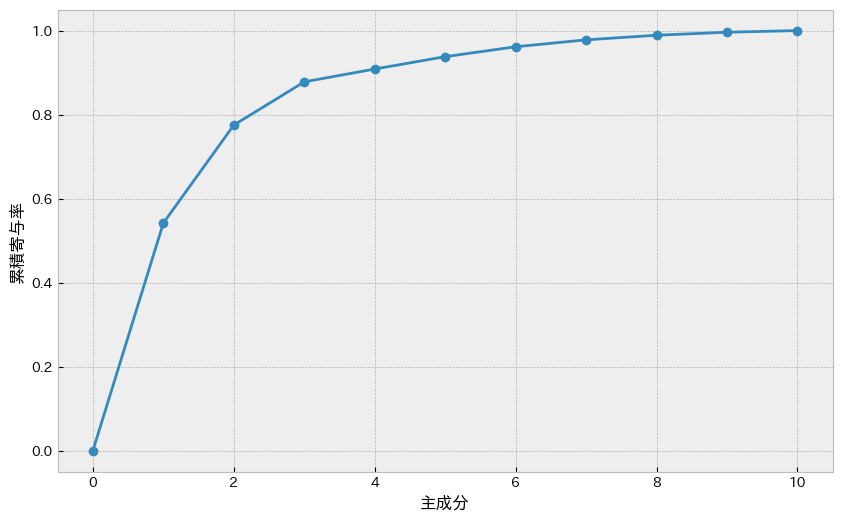

In [ ]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0]+list(np.cumsum(variance_ratio,)), '-o')
plt.xlabel('主成分')
plt.ylabel('累積寄与率')
plt.show()

#### 主成分負荷量
- 固有値 : 各種成分の分散の大きさ
- 固有ベクトル : 分散が最大になる方向

In [ ]:
# 固有ベクトル
eigenvector = pca.components_

In [ ]:
# DataFrameに格納
pd.DataFrame(eigenvector, index=[f'PC{x+1}' for x in range(len(eigenvector))], columns=df_scaled.columns)

現代文        古文        数学        化学        生物        物理        歴史  \
PC1  -0.330471 -0.345861 -0.264372 -0.312252 -0.371225 -0.261427 -0.323972   
PC2  -0.215454 -0.147589  0.472686  0.354349  0.251609  0.487920 -0.285686   
PC3  -0.352338 -0.418284  0.084606  0.002393  0.044721  0.009705  0.392747   
PC4  -0.256860 -0.011623 -0.459995  0.638958 -0.038767 -0.059016 -0.333653   
PC5   0.678160 -0.079317  0.037859  0.170128  0.095616 -0.298730 -0.100190   
PC6  -0.142910  0.578022  0.113232 -0.239358 -0.388621  0.305380 -0.043586   
PC7  -0.025355 -0.408031  0.181340 -0.216001  0.116020 -0.002665  0.171988   
PC8   0.119172 -0.123452  0.172296  0.451003 -0.700474  0.017178  0.433175   
PC9   0.352286 -0.389237  0.057152 -0.171071 -0.340150  0.399963 -0.461027   
PC10 -0.187015  0.099325  0.638617  0.055701 -0.124042 -0.589273 -0.325801   

           世界史      政治経済        英語  
PC1  -0.318760 -0.324065 -0.293324  
PC2  -0.265534 -0.272543 -0.234572  
PC3   0.363047  0.384869 -0.507406  
PC4   0.426382 -0.060221  0.110849  
PC5   0.184604 -0.262602 -0.540345  
PC6   0.426987 -0.240359 -0.298462  
PC7   0.450016 -0.588067  0.402421  
PC8  -0.186758 -0.117271  0.101179  
PC9   0.201125  0.379757  0.137742  
PC10  0.141556  0.196033  0.130320

In [ ]:
# 固有値の平方根
np.sqrt(pca.explained_variance_).reshape(10, 1).shape

(10, 1)

In [ ]:
# 主成分負荷量
factor_loading = pca.components_ * np.sqrt(pca.explained_variance_).reshape(10, 1)

In [ ]:
# DataFrameに格納
df_factor_loading = pd.DataFrame(factor_loading, index=[f'PC{x+1}' for x in range(len(factor_loading))], columns=df_scaled.columns)

In [ ]:
df_factor_loading.head()

現代文        古文        数学        化学        生物        物理        歴史  \
PC1 -0.778985 -0.815262 -0.623175 -0.736037 -0.875048 -0.616234 -0.763665   
PC2 -0.333235 -0.228270  0.731086  0.548058  0.389155  0.754649 -0.441860   
PC3 -0.362027 -0.429786  0.086932  0.002459  0.045950  0.009972  0.403547   
PC4 -0.143753 -0.006505 -0.257439  0.357597 -0.021696 -0.033029 -0.186731   
PC5  0.372639 -0.043583  0.020803  0.093483  0.052540 -0.164147 -0.055053   

          世界史      政治経済        英語  
PC1 -0.751380 -0.763885 -0.691421  
PC2 -0.410692 -0.421533 -0.362804  
PC3  0.373031  0.395452 -0.521359  
PC4  0.238627 -0.033703  0.062038  
PC5  0.101437 -0.144296 -0.296911

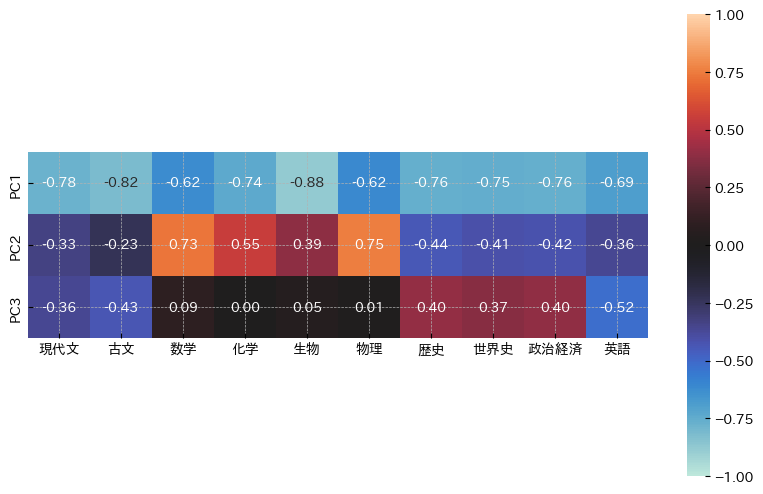

In [ ]:
# ヒートマップで可視化
sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0, vmin=-1.0, square=True, annot=True, fmt='.2f');

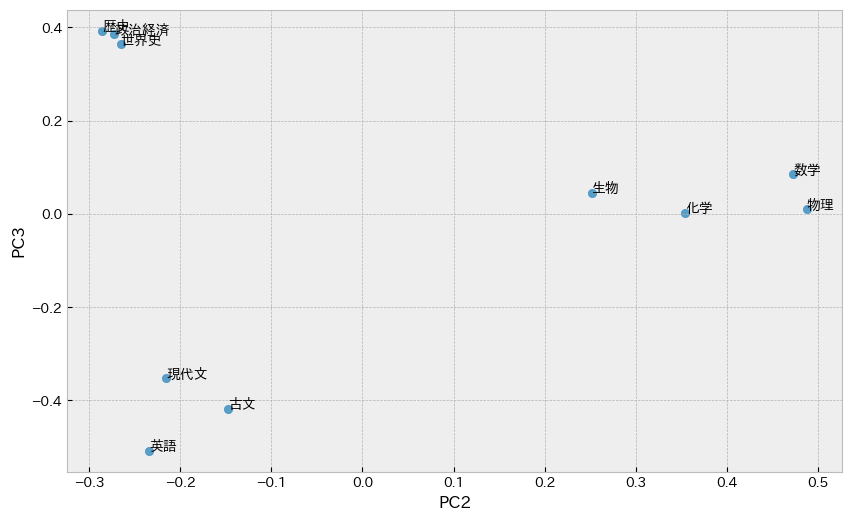

In [ ]:
# 第二主成分と第三主成分における観測変数の寄与度をプロットする
for x, y, name in zip(pca.components_[1], pca.components_[2], df.columns):
  plt.text(x, y, name)
plt.scatter(pca.components_[1], pca.components_[2], alpha=0.8)

plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

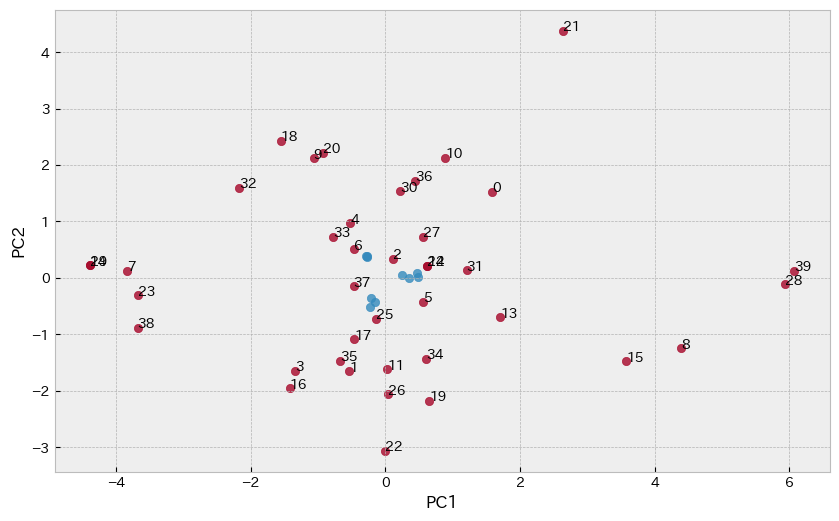

In [ ]:
# 第一主成分と第二主成分における主成分得点をプロットする
for x, y, name in zip(feature[:, 0], feature[:, 1], list(range(len(feature)))):
  plt.text(x, y, name)
plt.scatter(pca.components_[1], pca.components_[2], alpha=0.8)

# x, y軸の名前の追加
plt.xlabel('PC1')
plt.ylabel('PC2')

# 散布図の可視化
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, cmap='Blues')

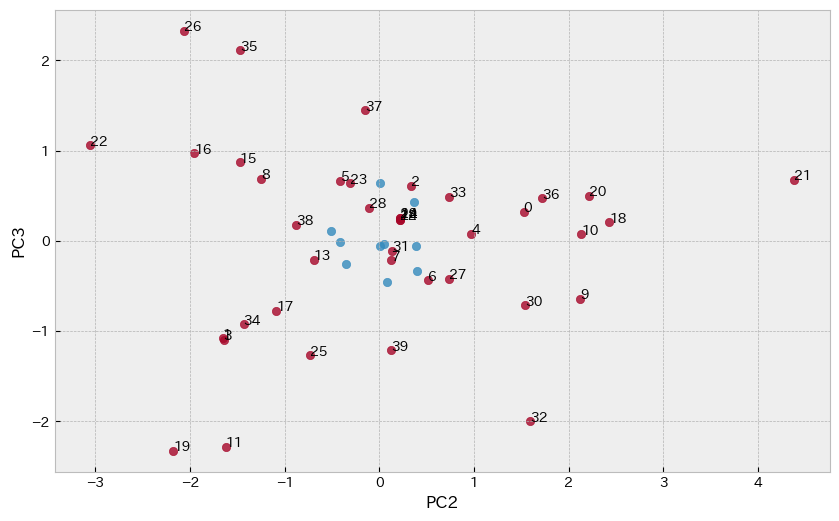

In [ ]:
# 第二主成分と第三主成分における主成分得点をプロットする
for x, y, name in zip(feature[:, 1], feature[:, 2], list(range(len(feature)))):
  plt.text(x, y, name)
plt.scatter(pca.components_[2], pca.components_[3], alpha=0.8)

# x, y軸の名前の追加
plt.xlabel('PC2')
plt.ylabel('PC3')

# 散布図の可視化
plt.scatter(feature[:, 1], feature[:, 2], alpha=0.8, cmap='Blues')

## 主成分分析の結果を可視化

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = 10, 6

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI-DataScience/hotel_reviews.csv')
df.head()

性別  年齢 個人/グループ 旅行の目的  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  \
0  女性  50    グループ    学生       4       4             4       4       3   
1  女性  35      個人  ビジネス       4       5             4       4       1   
2  女性  22    グループ   その他       1       1             1       4       1   
3  男性  30      個人  航空関係       3       4             3       4       5   
4  男性  59    グループ  航空関係       4       3             3       3       4   

   滞在時の快適さ  チェックイン・アウトの接客  その他のサービス  清潔さ  満足度  
0        4              4         4    4    4  
1        1              5         4    1    2  
2        5              1         3    1    3  
3        1              4         4    5    3  
4        4              3         5    4    4

In [ ]:
# 数値型のデータのみ取得
df_numeric = df.select_dtypes(include='number').drop(['満足度'], axis=1)
df_numeric.head()

年齢  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  滞在時の快適さ  チェックイン・アウトの接客  \
0  50       4       4             4       4       3        4              4   
1  35       4       5             4       4       1        1              5   
2  22       1       1             1       4       1        5              1   
3  30       3       4             3       4       5        1              4   
4  59       4       3             3       3       4        4              3   

   その他のサービス  清潔さ  
0         4    4  
1         4    1  
2         3    1  
3         4    5  
4         5    4

<Axes: >

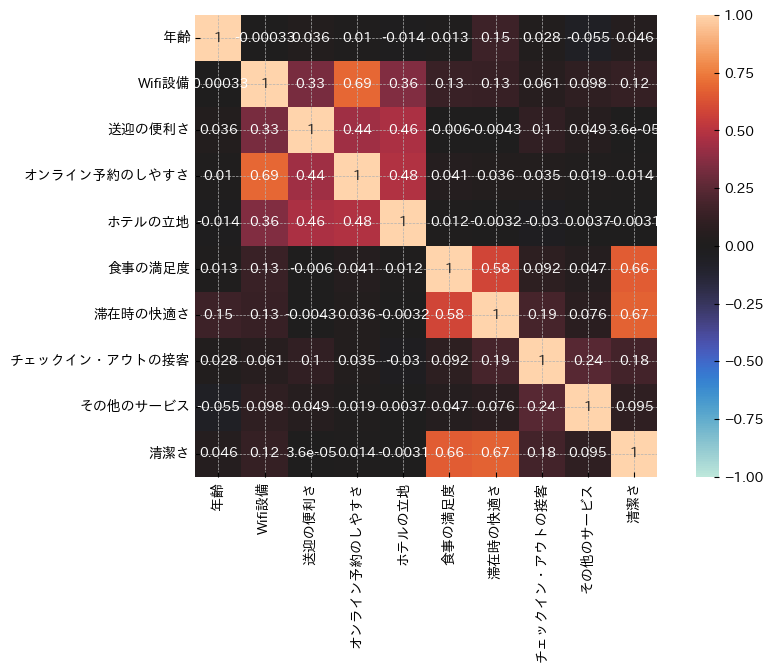

In [ ]:
# 相関の確認
sns.heatmap(df_numeric.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0)

In [ ]:
# 不要カラムを削除
data = df_numeric.drop(['年齢'], axis=1)
data.head()

Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  滞在時の快適さ  チェックイン・アウトの接客  \
0       4       4             4       4       3        4              4   
1       4       5             4       4       1        1              5   
2       1       1             1       4       1        5              1   
3       3       4             3       4       5        1              4   
4       4       3             3       3       4        4              3   

   その他のサービス  清潔さ  
0         4    4  
1         4    1  
2         3    1  
3         4    5  
4         5    4

In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# DataFrameに格納
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

Wifi設備    送迎の便利さ  オンライン予約のしやすさ    ホテルの立地    食事の満足度   滞在時の快適さ  \
0  0.949620  0.604184      0.870686  0.793117 -0.151073  0.426398   
1  0.949620  1.278798      0.870686  0.793117 -1.658784 -1.852588   
2 -1.452454 -1.419657     -1.383031  0.793117 -1.658784  1.186060   
3  0.148929  0.604184      0.119447  0.793117  1.356638 -1.852588   
4  0.949620 -0.070430      0.119447  0.008552  0.602783  0.426398   

   チェックイン・アウトの接客  その他のサービス       清潔さ  
0       0.559565  0.302711  0.548147  
1       1.352038  0.302711 -1.741841  
2      -1.817854 -0.552888 -1.741841  
3       0.559565  0.302711  1.311476  
4      -0.232908  1.158311  0.548147

## 主成分分析の実行

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)

In [ ]:
# 主成分分析の実行
feature = pca.fit_transform(data_scaled)

In [ ]:
feature

array([[-1.63765366e+00,  6.45483322e-01, -3.90538655e-01, ...,
        -3.66465821e-01,  3.17576292e-01,  1.41398406e-03],
       [ 2.86120324e-01,  3.30771772e+00, -1.71918120e+00, ...,
         3.24017556e-01,  1.24826674e-01, -2.85743195e-01],
       [ 2.57009097e+00,  5.45854316e-02,  1.24897398e+00, ...,
        -2.09072848e+00, -1.17295095e+00, -5.45512133e-01],
       ...,
       [-2.98363283e+00,  1.41348594e+00, -2.15988597e-01, ...,
         4.43505778e-02,  4.66415765e-02, -7.73624965e-02],
       [-3.35506288e+00,  7.59978124e-01,  2.31883456e+00, ...,
        -1.68790311e-01,  1.14616821e-01, -8.41733384e-02],
       [-6.94078670e-01, -1.78846568e+00,  2.07590637e+00, ...,
        -1.39374031e-01,  8.75521241e-04,  2.73984546e-01]])

## 主成分分析の結果を解釈

### 寄与率・累積寄与率

In [ ]:
# 寄与率
variance_ratio = pca.explained_variance_
pd.DataFrame(variance_ratio, index=[f'PC{x+1}' for x in range(len(variance_ratio))], columns=['寄与率'])

寄与率
PC1  2.546860
PC2  2.220024
PC3  1.185799
PC4  0.797551
PC5  0.736745
PC6  0.517546
PC7  0.411092
PC8  0.303860
PC9  0.281423

In [ ]:
# 主成分負荷量
factor_loading = pca.components_ * np.sqrt(pca.explained_variance_).reshape(9, 1)

df_factor_loading = pd.DataFrame(factor_loading, index=[f'PC{x+1}' for x in range(len(factor_loading))], columns=data.columns)

In [ ]:
df_factor_loading.head(3)

Wifi設備    送迎の便利さ  オンライン予約のしやすさ    ホテルの立地    食事の満足度   滞在時の快適さ  \
PC1 -0.679850 -0.497788     -0.643415 -0.502943 -0.581518 -0.593762   
PC2  0.407609  0.504640      0.571149  0.537421 -0.591292 -0.614555   
PC3  0.021599 -0.085695      0.071509  0.125734  0.221923  0.102413   

     チェックイン・アウトの接客  その他のサービス       清潔さ  
PC1      -0.270364 -0.193775 -0.607104  
PC2      -0.181945 -0.083744 -0.645571  
PC3      -0.710102 -0.761816  0.112785

<Axes: >

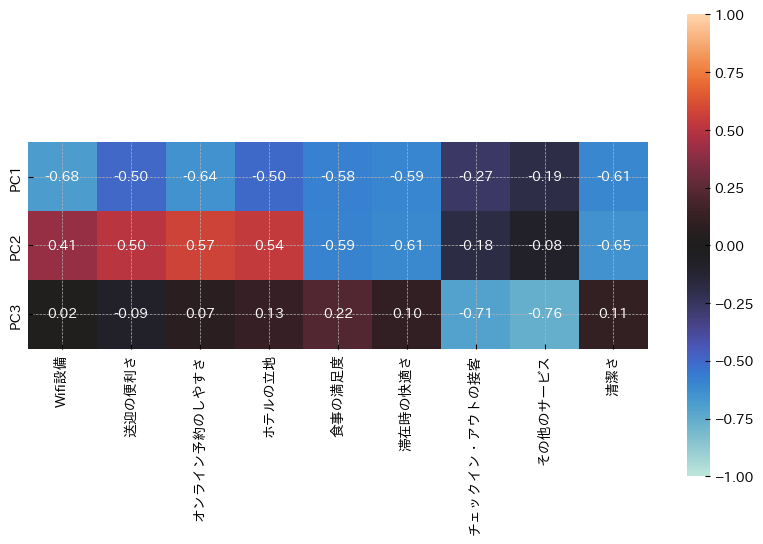

In [ ]:
# 可視化して確認
sns.heatmap(df_factor_loading.head(3), vmax=1, center=0, vmin=-1, square=True, annot=True, fmt='.2f')

## 主成分の結果を可視化

In [ ]:
# 主成分特典でプロットする
def feature_plot(x=1, y=2):
  plt.figure(figsize=(6, 6))
  plt.title(f'第{x}, 第{y}主成分得点のプロット')
  plt.scatter(feature[:, x-1], feature[:, y-1], alpha=0.8, c=list(df.iloc[:, -1]))
  plt.xlabel(f'PC{x}')
  plt.ylabel(f'PC{y}')
  plt.colorbar()
  plt.show()

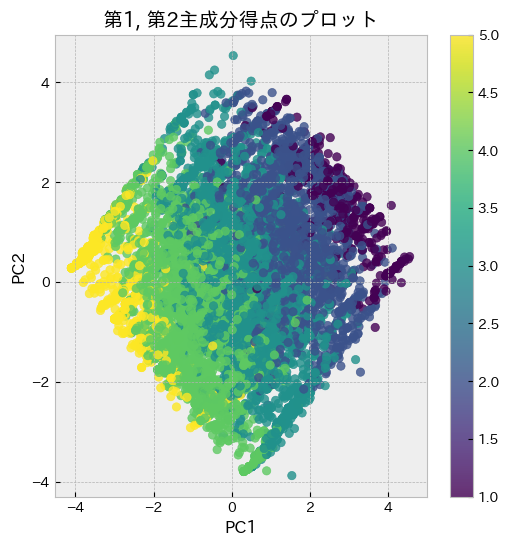

In [ ]:
feature_plot(1, 2)

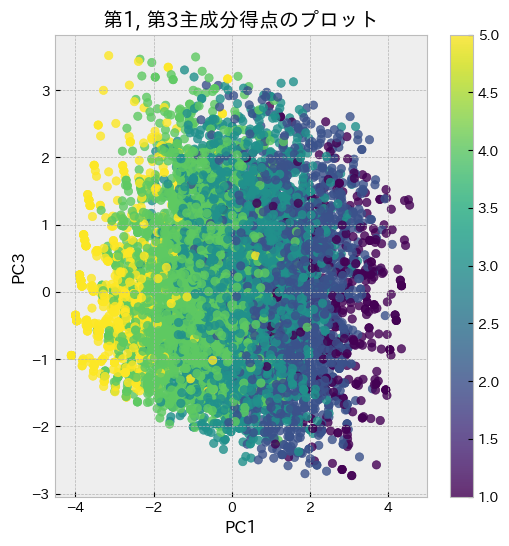

In [ ]:
feature_plot(1, 3)

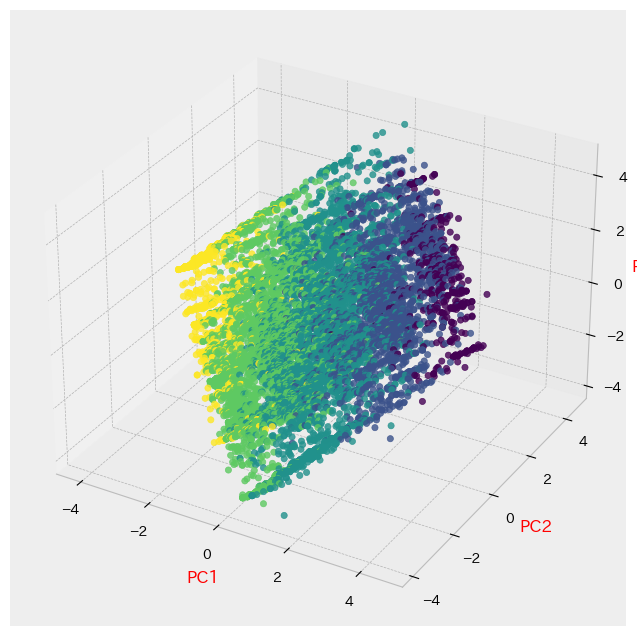

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1', c='r')
ax.set_ylabel('PC2', c='r')
ax.set_zlabel('PC3', c='r')
ax.scatter(feature[:, 0], feature[:, 1], feature[:, 1], alpha=0.8, c=list(df.iloc[:, -1]))
plt.show();

In [ ]:
# 各種成分をDataFrame型で取得
_df_feature = pd.DataFrame(feature[:, :3], columns=['総合評価', 'ホテルの環境評価', '接客の評価'])
_df_feature.head()

総合評価  ホテルの環境評価     接客の評価
0 -1.637654  0.645483 -0.390539
1  0.286120  3.307718 -1.719181
2  2.570091  0.054585  1.248974
3 -0.985539  0.149397 -0.283761
4 -1.121424 -0.404443 -0.405535

In [ ]:
# 元のデータを結合
df_new = pd.concat([df, _df_feature], axis=1)
df_new.head()

性別  年齢 個人/グループ 旅行の目的  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  \
0  女性  50    グループ    学生       4       4             4       4       3   
1  女性  35      個人  ビジネス       4       5             4       4       1   
2  女性  22    グループ   その他       1       1             1       4       1   
3  男性  30      個人  航空関係       3       4             3       4       5   
4  男性  59    グループ  航空関係       4       3             3       3       4   

   滞在時の快適さ  チェックイン・アウトの接客  その他のサービス  清潔さ  満足度      総合評価  ホテルの環境評価     接客の評価  
0        4              4         4    4    4 -1.637654  0.645483 -0.390539  
1        1              5         4    1    2  0.286120  3.307718 -1.719181  
2        5              1         3    1    3  2.570091  0.054585  1.248974  
3        1              4         4    5    3 -0.985539  0.149397 -0.283761  
4        4              3         5    4    4 -1.121424 -0.404443 -0.405535

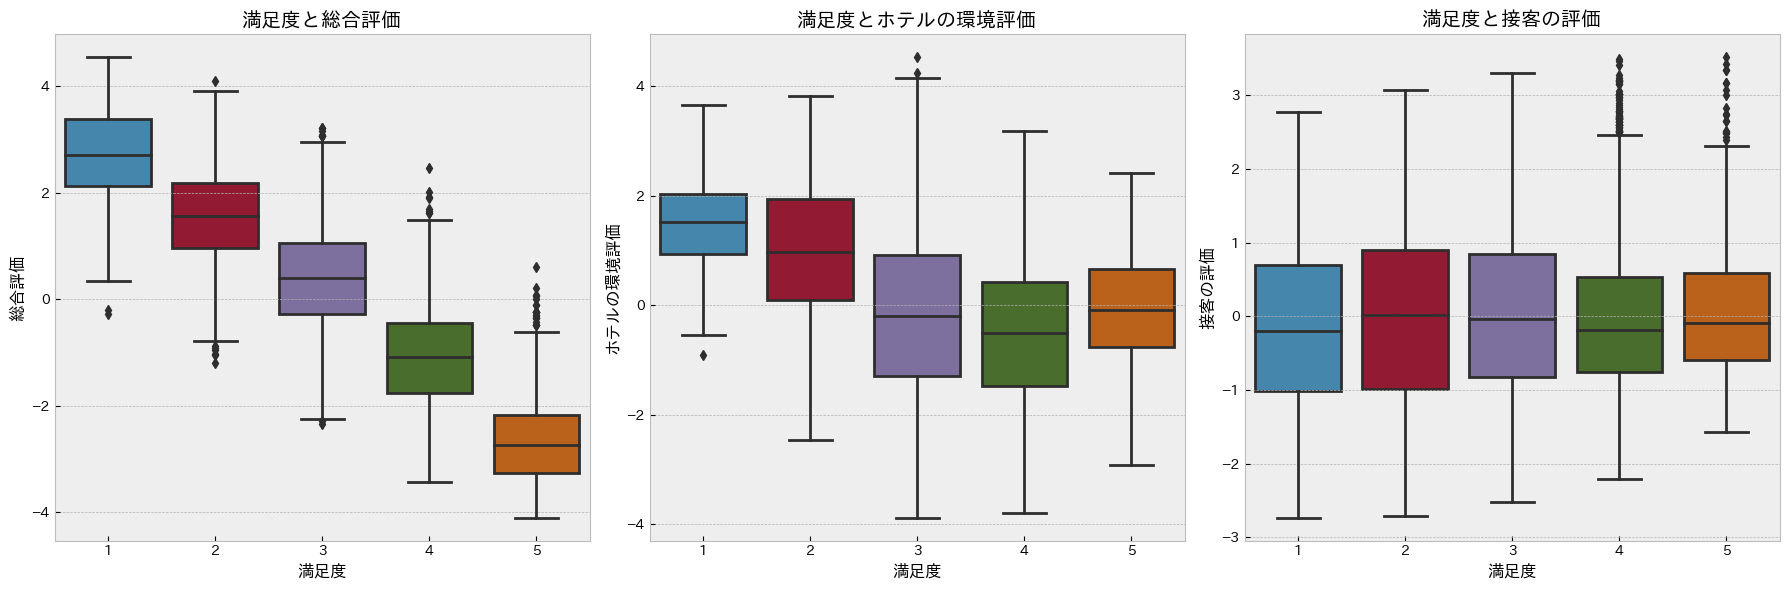

In [ ]:
# 満足度別に箱ひげ図を可視化
plt.rcParams['figure.figsize'] = 18, 6
plt.subplot(1, 3, 1)
plt.title('満足度と総合評価')
sns.boxplot(x='満足度', y='総合評価', data=df_new)
plt.subplot(1, 3, 2)
plt.title('満足度とホテルの環境評価')
sns.boxplot(x='満足度', y='ホテルの環境評価', data=df_new)
plt.subplot(1, 3, 3)
plt.title('満足度と接客の評価')
sns.boxplot(x='満足度', y='接客の評価', data=df_new)
plt.tight_layout();

## クラスタリング

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = 10, 10

In [ ]:
# データの読み込み
df = pd.read_csv('/content/drive/MyDrive/AI-DataScience/academic_ability.csv')
df.head(3)

現代文  古文  数学  化学  生物  物理  歴史  世界史  政治経済  英語
0    2   3   4   3   3   4   3    2     3   2
1    5   4   3   3   3   2   4    3     4   5
2    3   3   3   4   3   4   3    4     4   3

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# DataFrame -> ndarray
x = df.values

In [ ]:
type(x)

numpy.ndarray

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# インスタンス化
kmeans = KMeans(n_clusters=4, random_state=0)

In [ ]:
# モデルの学習
kmeans.fit(x)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# クラスタリングの結果を取得
cluster = kmeans.labels_

In [ ]:
# clusterカラムの追加
df['cluster'] = cluster
df.head()

現代文  古文  数学  化学  生物  物理  歴史  世界史  政治経済  英語  cluster
0    2   3   4   3   3   4   3    2     3   2        2
1    5   4   3   3   3   2   4    3     4   5        1
2    3   3   3   4   3   4   3    4     4   3        2
3    5   5   3   3   3   3   4    4     4   5        1
4    4   3   4   5   4   3   3    3     4   3        2

In [ ]:
groups = df.groupby('cluster')

In [ ]:
# サイズ
groups.size()

cluster
0     6
1    12
2    18
3     4
dtype: int64

In [ ]:
mean = groups.agg(['min', 'max', 'mean', 'median'])
mean

現代文                       古文                       数学      ...  \
        min max      mean median min max      mean median min max  ...   
cluster                                                            ...   
0         5   5  5.000000    5.0   5   5  5.000000    5.0   4   5  ...   
1         2   5  3.916667    4.0   2   5  3.833333    4.0   2   3  ...   
2         1   4  3.000000    3.0   1   4  3.000000    3.0   3   5  ...   
3         1   3  1.750000    1.5   1   2  1.500000    1.5   1   2  ...   

              世界史        政治経済                       英語                       
             mean median  min max      mean median min max      mean median  
cluster                                                                      
0        4.666667    5.0    3   5  4.666667    5.0   4   5  4.833333    5.0  
1        3.916667    4.0    3   5  3.833333    4.0   3   5  4.416667    5.0  
2        3.111111    3.0    1   5  3.277778    3.0   1   5  2.944444    3.0  
3        2.000000    2.0    1   3  2.250000    2.5   1   2  1.500000    1.5  

[4 rows x 40 columns]

NotImplementedError: ignored

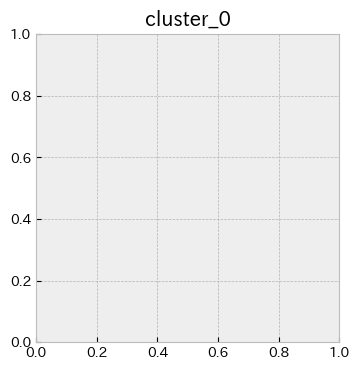

In [ ]:
# クラスターごとに可視化
plt.figure(figsize=(18, 4))

num = kmeans.n_clusters

for n in range(num):
  plt.subplot(1, num, n+1)
  plt.title(f'cluster_{n}')
  sns.barplot(x=mean.columns, y=mean.loc[n])
  plt.tight_layout()

ValueError: ignored

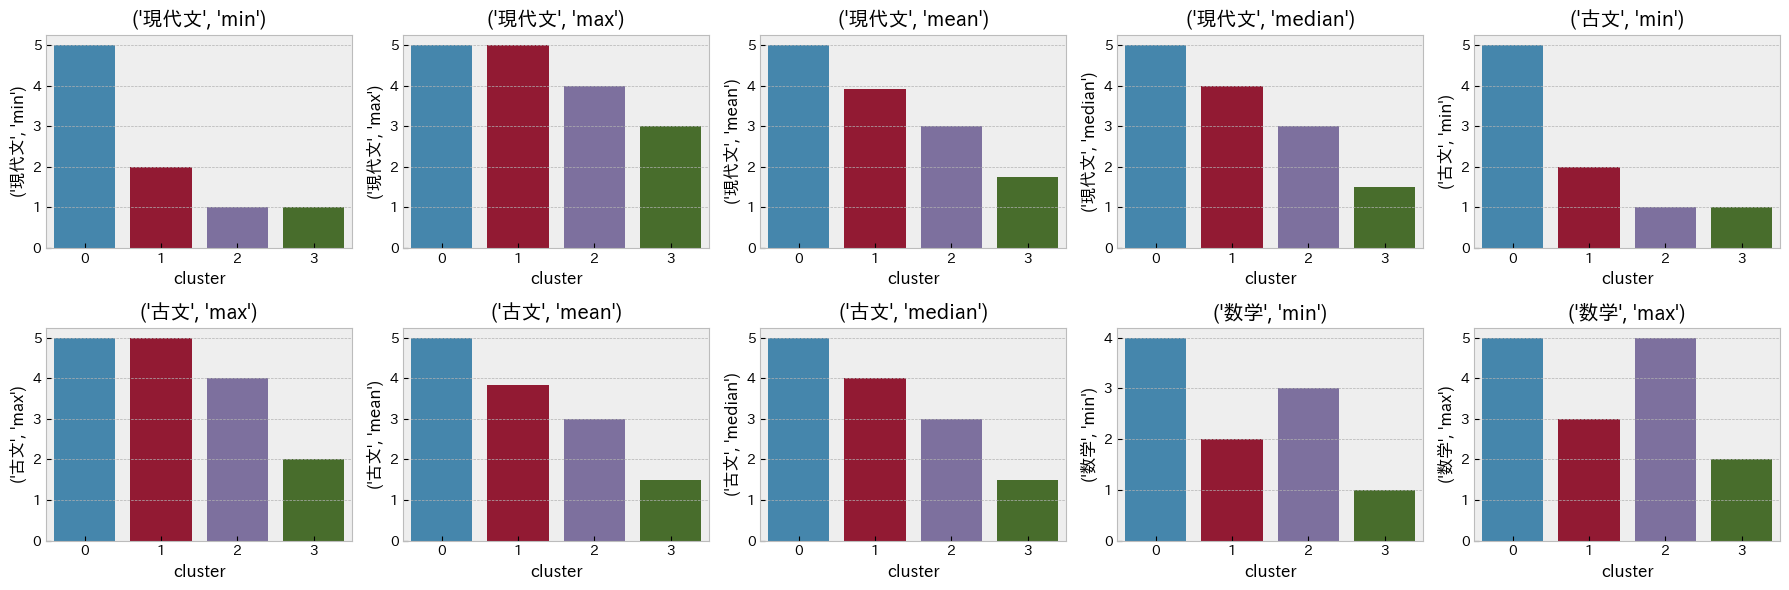

In [ ]:
# 各科目ごとに可視化して確認
plt.figure(figsize=(18, 6))
for n, col in enumerate(mean.columns):
  plt.subplot(2, 5, n+1)
  plt.title(f'{col}')
  sns.barplot(x=mean.index, y=mean[col])
  plt.tight_layout()

## クラスタリングと主成分分析

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=2, random_state=0)

In [ ]:
# データの標準化
x_scaled = scaler.fit_transform(x)

# 主成分分析の実行
feature = pca.fit_transform(x_scaled)

In [ ]:
new_df = df.copy()
new_df.head(2)

現代文  古文  数学  化学  生物  物理  歴史  世界史  政治経済  英語  cluster
0    2   3   4   3   3   4   3    2     3   2        2
1    5   4   3   3   3   2   4    3     4   5        1

In [ ]:
# 主成分負荷量の追加
new_df[['PC1', 'PC2']] = feature
new_df.head()

現代文  古文  数学  化学  生物  物理  歴史  世界史  政治経済  英語  cluster       PC1       PC2
0    2   3   4   3   3   4   3    2     3   2        2  1.582937  1.522060
1    5   4   3   3   3   2   4    3     4   5        1 -0.537827 -1.654101
2    3   3   3   4   3   4   3    4     4   3        2  0.107779  0.336046
3    5   5   3   3   3   3   4    4     4   5        1 -1.339368 -1.645856
4    4   3   4   5   4   3   3    3     4   3        2 -0.518339  0.969427

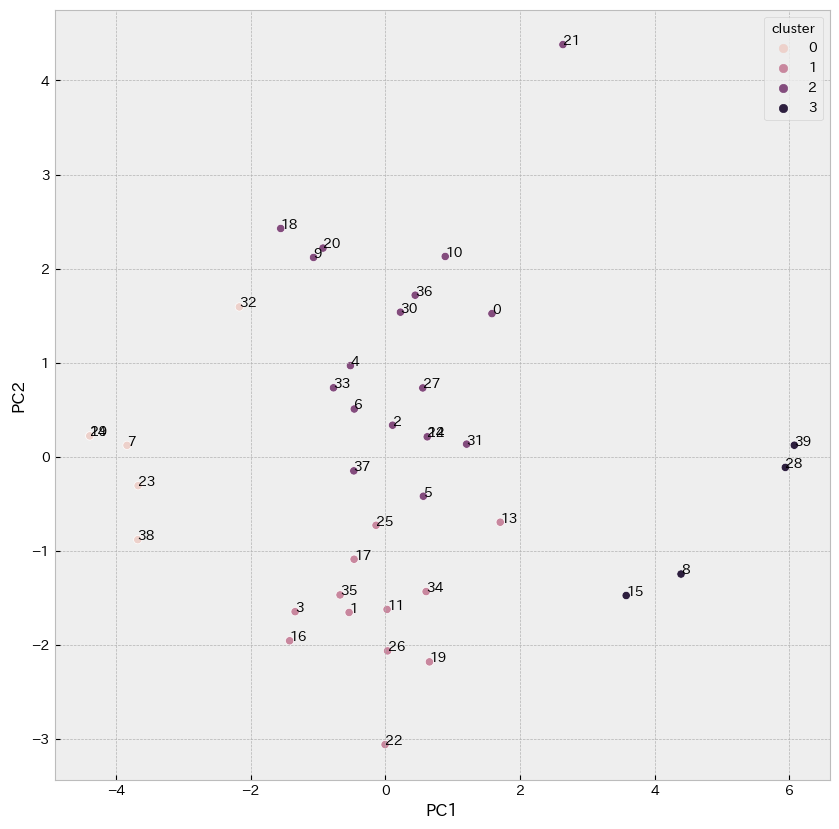

In [ ]:
# 散布図を可視化
plt.figure(figsize=(10, 10))

for x, y, name in zip(new_df['PC1'], new_df['PC2'], list(range(len(new_df)))):
    plt.text(x, y, name)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=new_df);

## クラスタリング

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI-DataScience/hotel_reviews.csv')
df.head()

性別  年齢 個人/グループ 旅行の目的  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  \
0  女性  50    グループ    学生       4       4             4       4       3   
1  女性  35      個人  ビジネス       4       5             4       4       1   
2  女性  22    グループ   その他       1       1             1       4       1   
3  男性  30      個人  航空関係       3       4             3       4       5   
4  男性  59    グループ  航空関係       4       3             3       3       4   

   滞在時の快適さ  チェックイン・アウトの接客  その他のサービス  清潔さ  満足度  
0        4              4         4    4    4  
1        1              5         4    1    2  
2        5              1         3    1    3  
3        1              4         4    5    3  
4        4              3         5    4    4

In [ ]:
df_numeric = df.select_dtypes(include='number')
df_numeric.head(2)

年齢  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  滞在時の快適さ  チェックイン・アウトの接客  \
0  50       4       4             4       4       3        4              4   
1  35       4       5             4       4       1        1              5   

   その他のサービス  清潔さ  満足度  
0         4    4    4  
1         4    1    2

In [ ]:
# 相関の確認
df_numeric.corr()['年齢']

年齢               1.000000
Wifi設備          -0.000330
送迎の便利さ           0.036484
オンライン予約のしやすさ     0.010020
ホテルの立地          -0.014362
食事の満足度           0.013261
滞在時の快適さ          0.149749
チェックイン・アウトの接客    0.027539
その他のサービス        -0.055383
清潔さ              0.046433
満足度              0.077890
Name: 年齢, dtype: float64

In [ ]:
# 年齢・満足度列の削除
_df = df_numeric.drop(['年齢', '満足度'], axis=1)
_df.head(3)

Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  滞在時の快適さ  チェックイン・アウトの接客  \
0       4       4             4       4       3        4              4   
1       4       5             4       4       1        1              5   
2       1       1             1       4       1        5              1   

   その他のサービス  清潔さ  
0         4    4  
1         4    1  
2         3    1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
# 標準化の実行
x_scaled = scaler.fit_transform(_df)
x_scaled[0]

array([ 0.94961961,  0.60418417,  0.87068588,  0.79311742, -0.15107264,
        0.42639835,  0.55956515,  0.30271115,  0.5481468 ])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_scaled)             # クラスタリングの計算を実行
    sse.append(kmeans.inertia_)   # kmeans.fitするとkmeans.inertia_が得られる

In [ ]:
plt.plot(range(1,11), sse , marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_
print(cluster)

[2 0 0 ... 2 2 1]


In [ ]:
# cluster、満足度のカラム追加
df['cluster'] = cluster
df.head(2)

性別  年齢 個人/グループ 旅行の目的  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  \
0  女性  50    グループ    学生       4       4             4       4       3   
1  女性  35      個人  ビジネス       4       5             4       4       1   

   滞在時の快適さ  チェックイン・アウトの接客  その他のサービス  清潔さ  満足度  cluster  
0        4              4         4    4    4        2  
1        1              5         4    1    2        0

In [ ]:
# クラスターごとにグループ分け
groups = df.groupby('cluster')
groups.size()

cluster
0    3291
1    3058
2    3651
dtype: int64

In [ ]:
# 代表値を取得
groups.agg(['min', 'max', 'mean', 'median'])

年齢                       Wifi設備                      送迎の便利さ      ...  \
        min max       mean median    min max      mean median    min max  ...   
cluster                                                                   ...   
0         7  80  37.333637   36.0      1   5  2.515041    2.0      0   5  ...   
1         7  80  40.347613   41.0      1   5  1.949967    2.0      0   5  ...   
2         7  80  40.706656   42.0      1   5  3.807176    4.0      0   5  ...   

         その他のサービス        清潔さ                      満足度                       
             mean median min max      mean median min max      mean median  
cluster                                                                     
0        3.396840    4.0   0   5  1.914312    2.0   1   4  2.272258    2.0  
1        3.684107    4.0   1   5  3.980052    4.0   1   5  3.302485    3.0  
2        3.839222    4.0   1   5  3.929882    4.0   2   5  3.955629    4.0  

[3 rows x 44 columns]

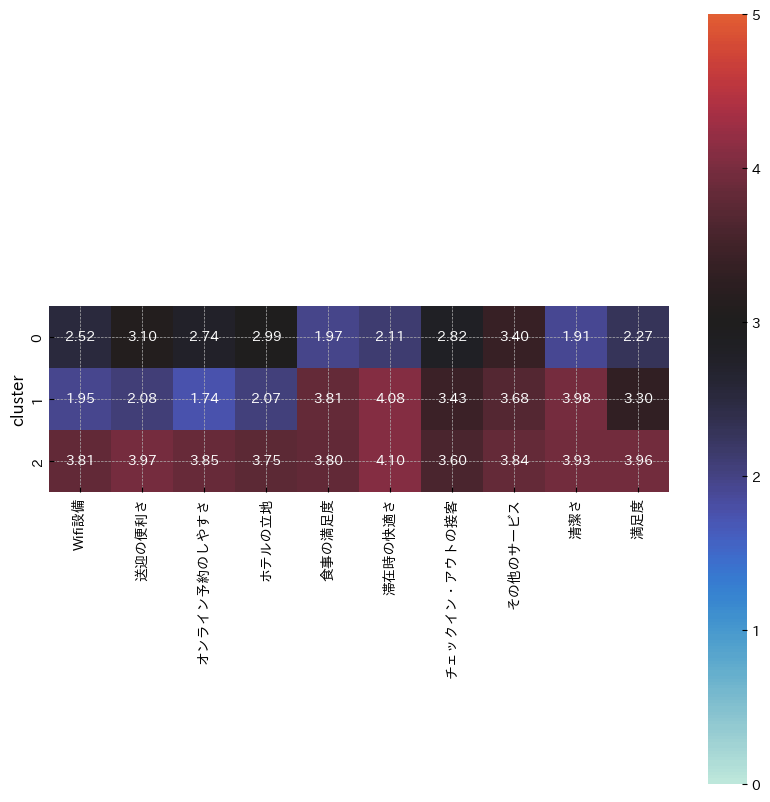

In [ ]:
mean = groups.mean().drop('年齢', axis=1)
sns.heatmap(mean, square=True, annot=True, fmt='.2f', vmax=5.0, center=3.0, vmin=0.0);

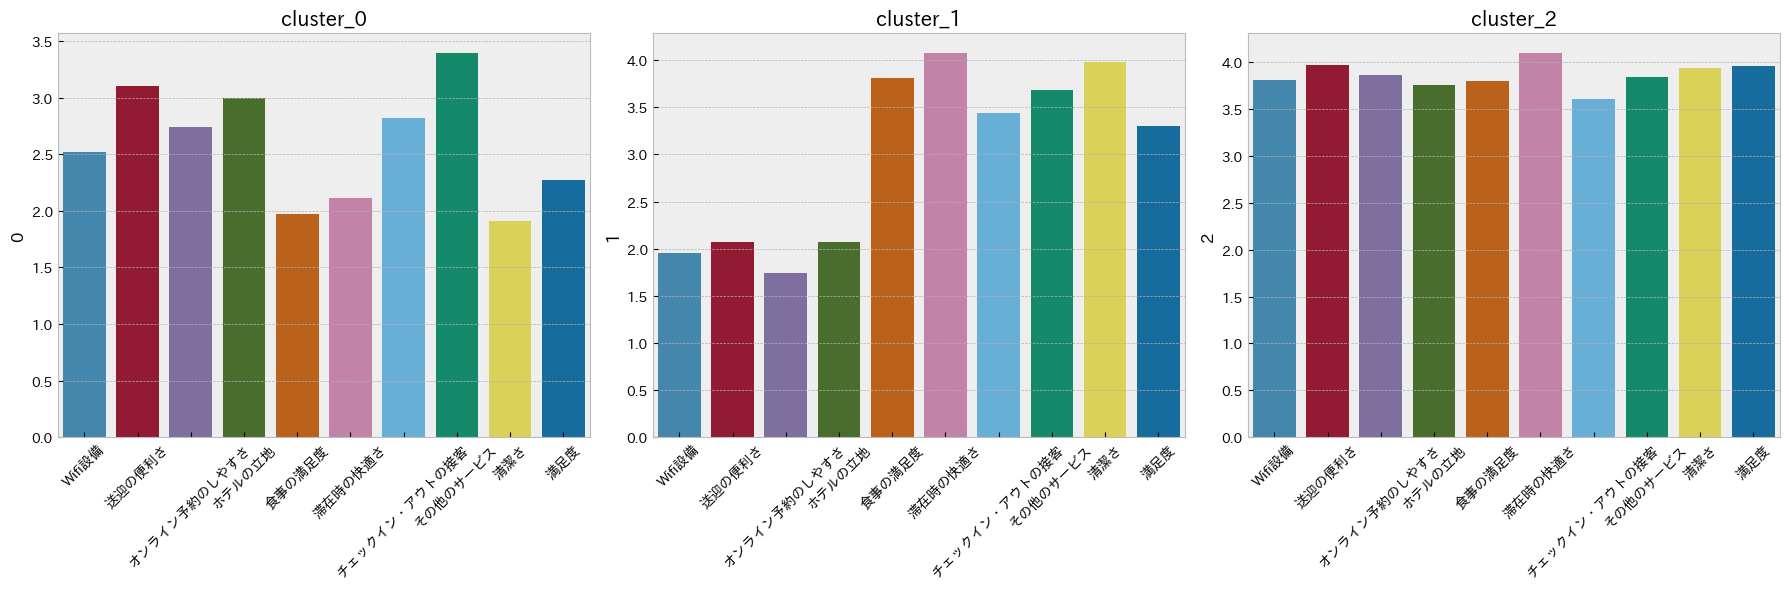

In [ ]:
# クラスタの数を取得
num = kmeans.n_clusters

# クラスターごとに可視化して確認
plt.figure(figsize=(18, 6))


for n in range(num):
    plt.subplot(1, 3, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=mean.columns, y=mean.loc[n])
    plt.xticks(rotation=45) # 凡例を 45 ℃ 傾けて表示
    plt.tight_layout() # 文字の頭などがないように表示

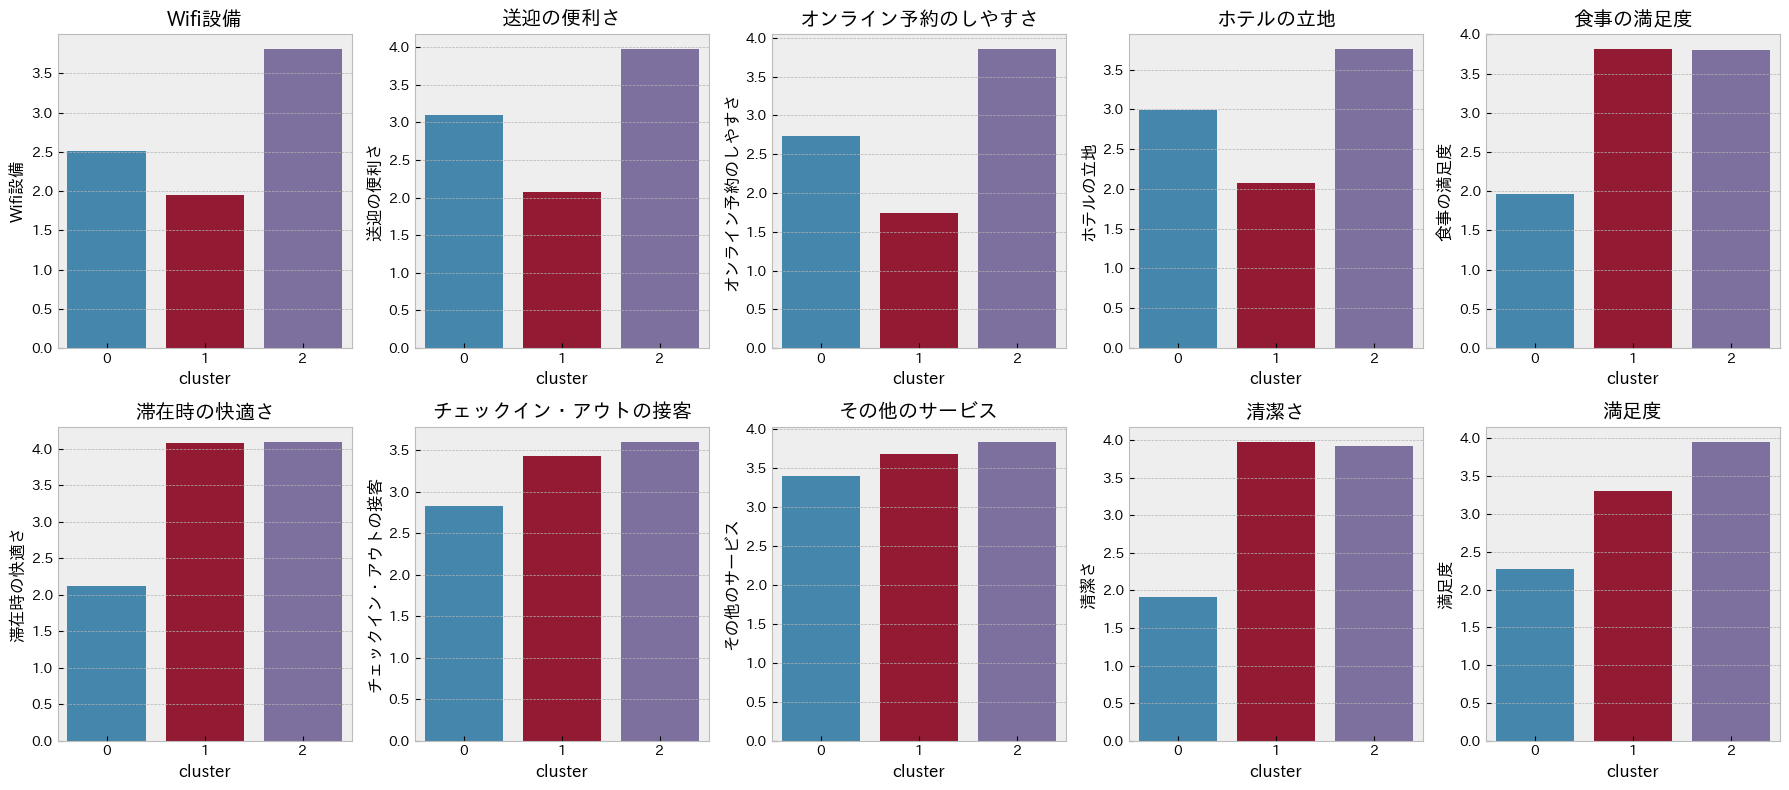

In [ ]:
# 各変数毎に可視化して確認
plt.figure(figsize=(18, 8))

for i, col in enumerate(mean.columns):
    plt.subplot(2, 5, i+1)
    plt.title(f'{col}')
    sns.barplot(x=mean.index, y=mean[col])
    plt.tight_layout()

In [ ]:
# 各クラスターを取得（可視化のためにindexを振り直す）
cluster_0 = groups.get_group(0)
cluster_0 = cluster_0.reset_index(drop=True)
cluster_0.head(2)

性別  年齢 個人/グループ 旅行の目的  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  \
0  女性  35      個人  ビジネス       4       5             4       4       1   
1  女性  22    グループ   その他       1       1             1       4       1   

   滞在時の快適さ  チェックイン・アウトの接客  その他のサービス  清潔さ  満足度  cluster  
0        1              5         4    1    2        0  
1        5              1         3    1    3        0

In [ ]:
cluster_1 = groups.get_group(1)
cluster_1 = cluster_1.reset_index(drop=True)
cluster_2 = groups.get_group(2)
cluster_2 = cluster_2.reset_index(drop=True)

In [ ]:
# 箱ひげ図可視化用の関数
def box_plot(col1, col2, dflist, high=6, width=18):
    plt.rcParams['figure.figsize'] = width, high

    for i, cluster in enumerate(dflist):
        plt.subplot(1, len(dflist), i+1)
        plt.title(f'クラスター{i}：{col1}と{col2}')
        sns.boxplot(x=col1, y=col2, data=cluster)
        plt.tight_layout();

In [ ]:
df_list = [cluster_0, cluster_1, cluster_2]

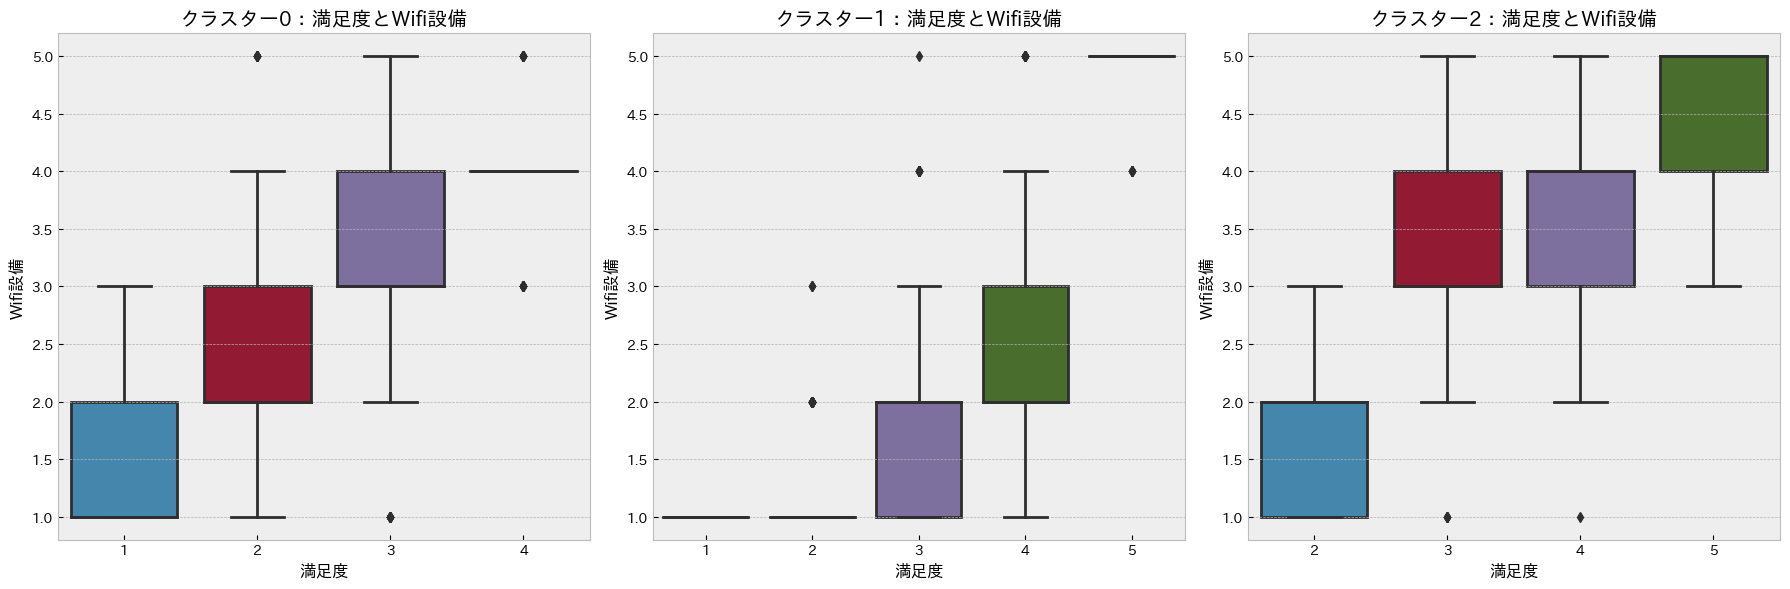

In [ ]:
box_plot('満足度', 'Wifi設備', df_list)

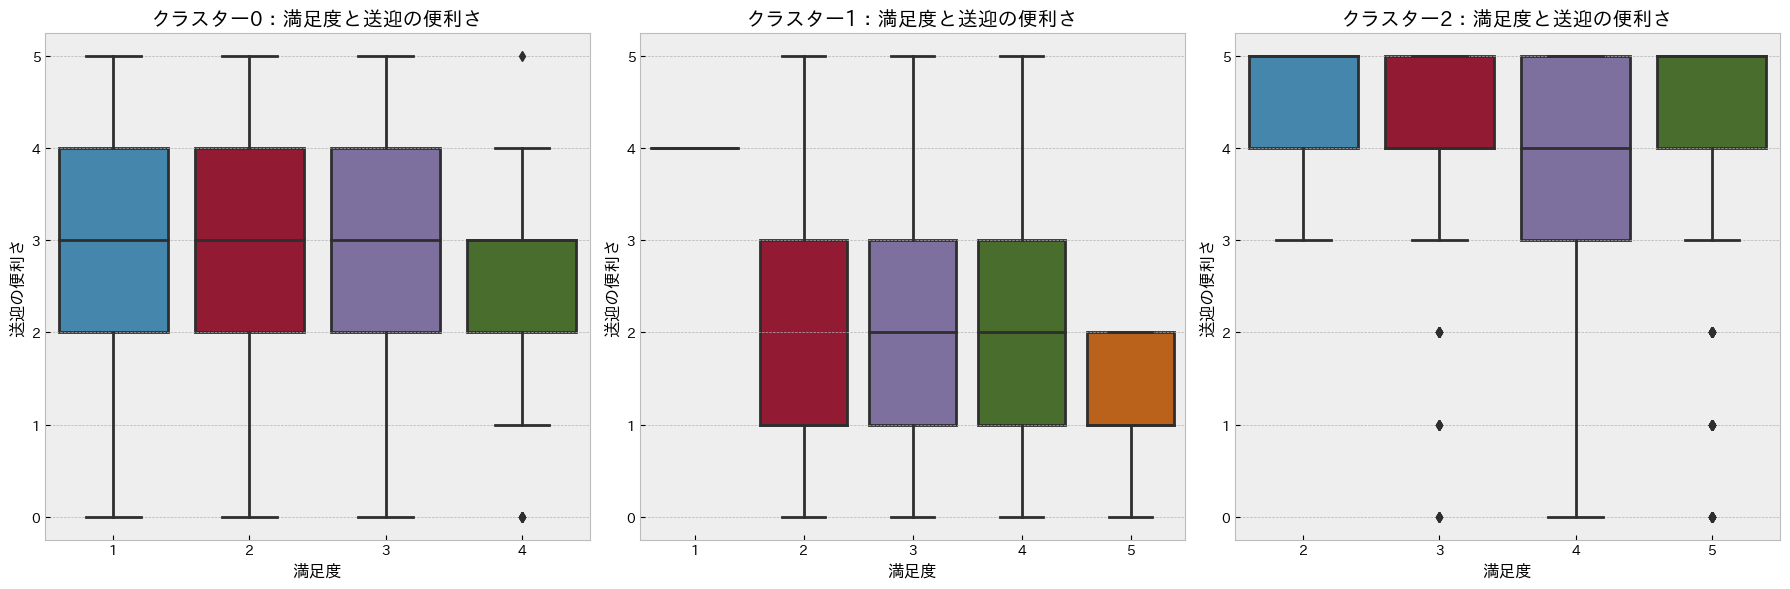

In [ ]:
# 送迎の便利さ
box_plot('満足度', '送迎の便利さ', df_list)

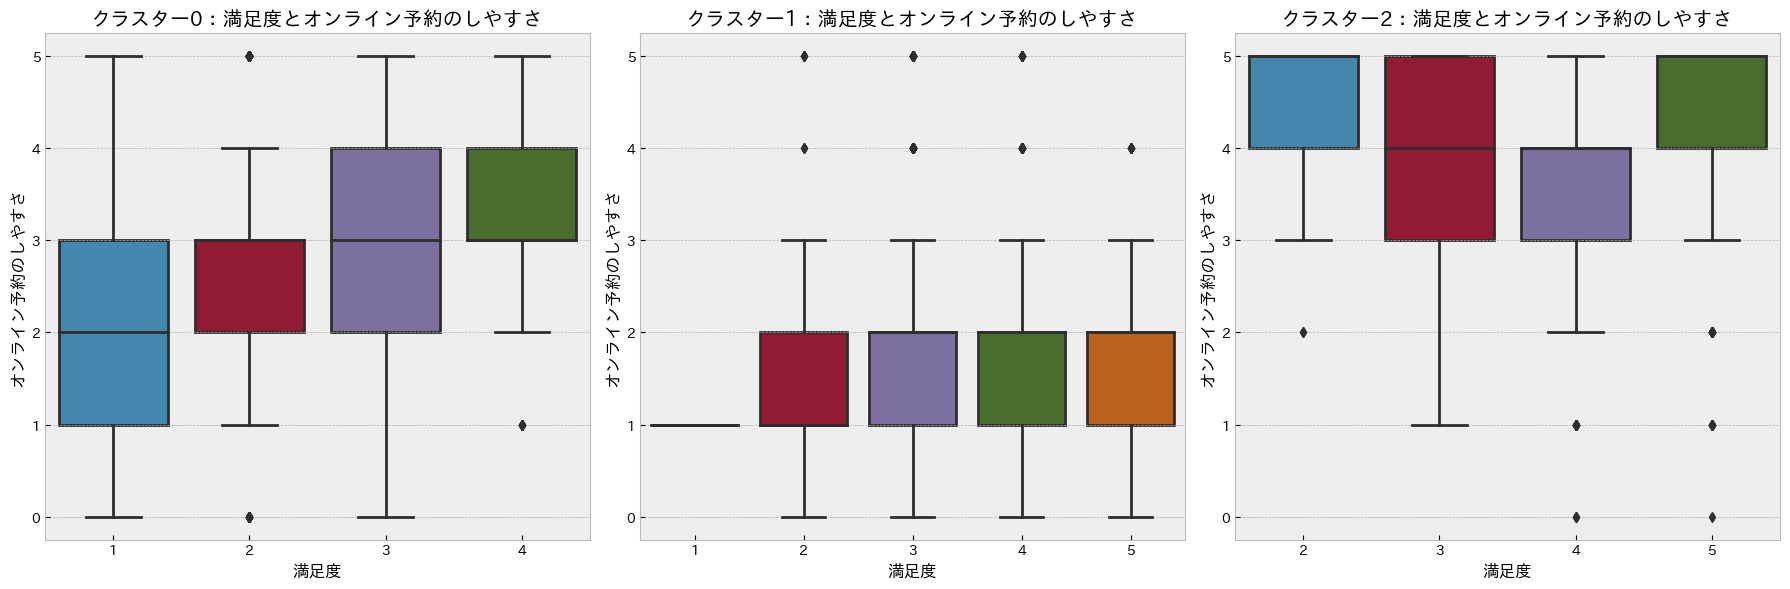

In [ ]:
# オンライン予約のしやすさ
box_plot('満足度', 'オンライン予約のしやすさ', df_list)

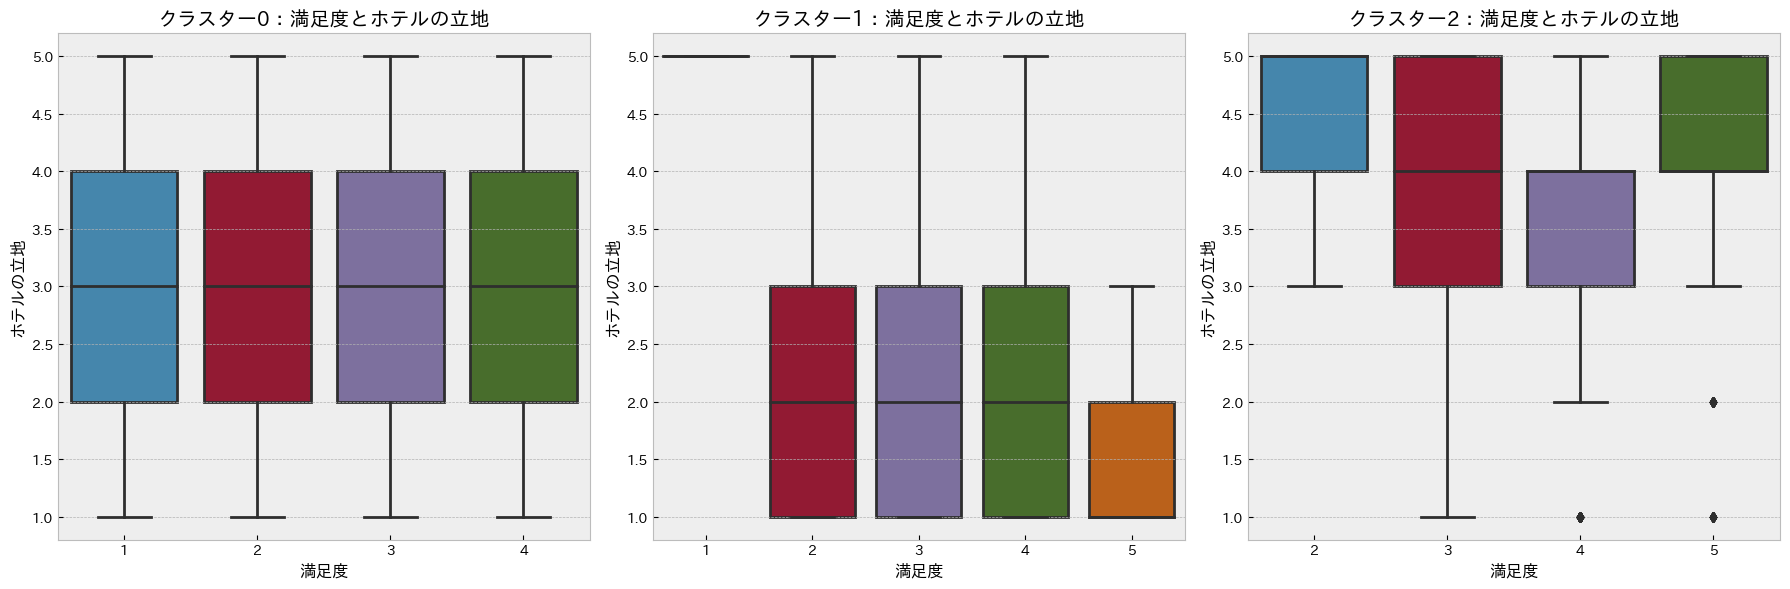

In [ ]:
# ホテルの立地
box_plot('満足度', 'ホテルの立地', df_list)

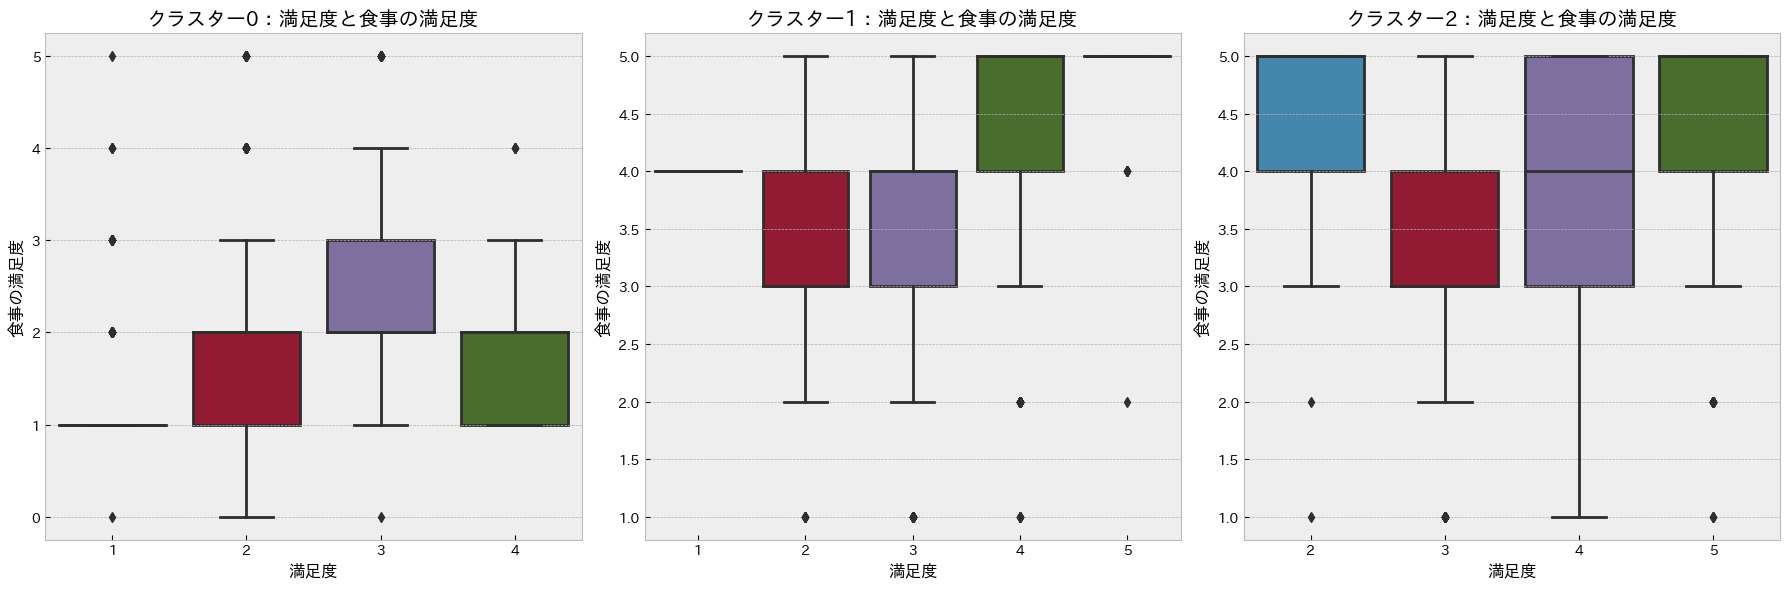

In [ ]:
# 食事の満足度について
box_plot('満足度', '食事の満足度', df_list)

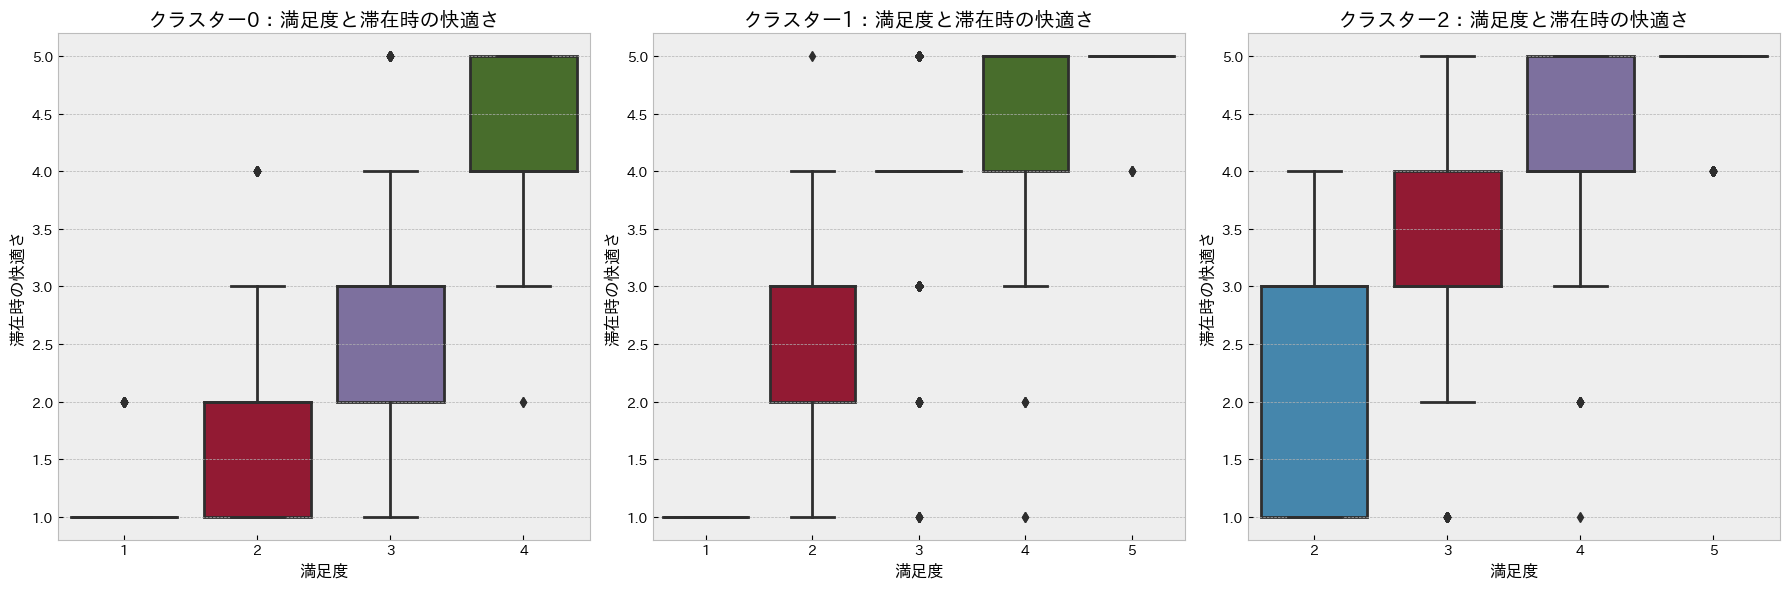

In [ ]:
# 滞在時の快適さについて
box_plot('満足度', '滞在時の快適さ', df_list)

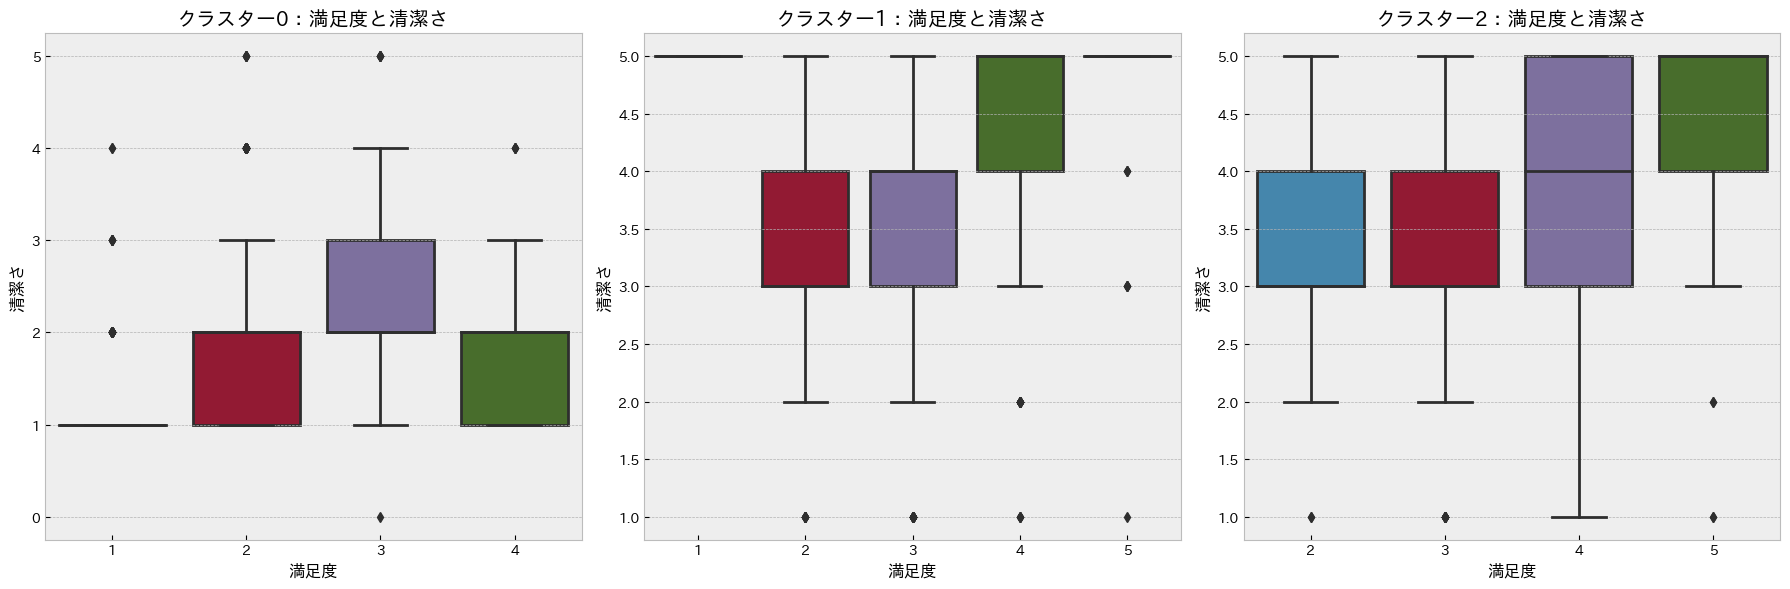

In [ ]:
# 清潔さについて
box_plot('満足度', '清潔さ', df_list)

## クラスタリング

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI-DataScience/hotel_reviews.csv')
df.head()

性別  年齢 個人/グループ 旅行の目的  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  \
0  女性  50    グループ    学生       4       4             4       4       3   
1  女性  35      個人  ビジネス       4       5             4       4       1   
2  女性  22    グループ   その他       1       1             1       4       1   
3  男性  30      個人  航空関係       3       4             3       4       5   
4  男性  59    グループ  航空関係       4       3             3       3       4   

   滞在時の快適さ  チェックイン・アウトの接客  その他のサービス  清潔さ  満足度  
0        4              4         4    4    4  
1        1              5         4    1    2  
2        5              1         3    1    3  
3        1              4         4    5    3  
4        4              3         5    4    4

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# 数値データのみを取得
df_numeric = df.select_dtypes(include='number')
# 年齢列を削除
_df = df_numeric.drop(['年齢', '満足度'], axis=1)
# 標準化
x_scaled = scaler.fit_transform(_df)
x_scaled[0]

array([ 0.94961961,  0.60418417,  0.87068588,  0.79311742, -0.15107264,
        0.42639835,  0.55956515,  0.30271115,  0.5481468 ])

In [ ]:
from sklearn.cluster import KMeans

# クラスラリングの実行
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)

# クラスタリングの結果を追加
df['cluster'] = kmeans.labels_
df.head(2)

性別  年齢 個人/グループ 旅行の目的  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  \
0  女性  50    グループ    学生       4       4             4       4       3   
1  女性  35      個人  ビジネス       4       5             4       4       1   

   滞在時の快適さ  チェックイン・アウトの接客  その他のサービス  清潔さ  満足度  cluster  
0        4              4         4    4    4        2  
1        1              5         4    1    2        0

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=0)

In [ ]:
feature = pca.fit_transform(x_scaled)
feature_df = pd.DataFrame(feature, columns=['総合評価', 'ホテルの環境評価', '接客の評価'])
new_data = pd.concat([df, feature_df], axis=1)
new_data.head(2)

性別  年齢 個人/グループ 旅行の目的  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  \
0  女性  50    グループ    学生       4       4             4       4       3   
1  女性  35      個人  ビジネス       4       5             4       4       1   

   滞在時の快適さ  チェックイン・アウトの接客  その他のサービス  清潔さ  満足度  cluster      総合評価  ホテルの環境評価  \
0        4              4         4    4    4        2 -1.637654  0.645483   
1        1              5         4    1    2        0  0.286120  3.307718   

      接客の評価  
0 -0.390539  
1 -1.719181

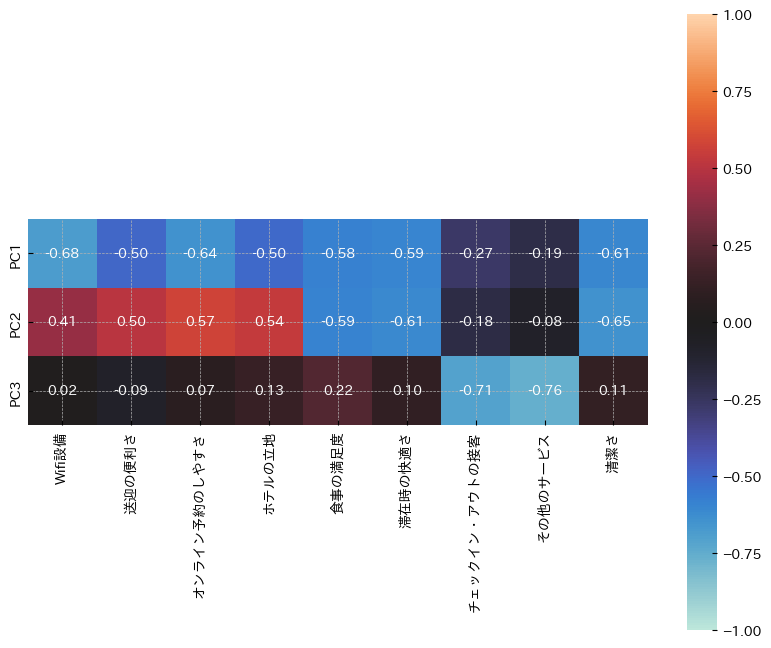

In [ ]:
cols = df_numeric.columns.drop(['年齢', '満足度'])

factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=cols
)

sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

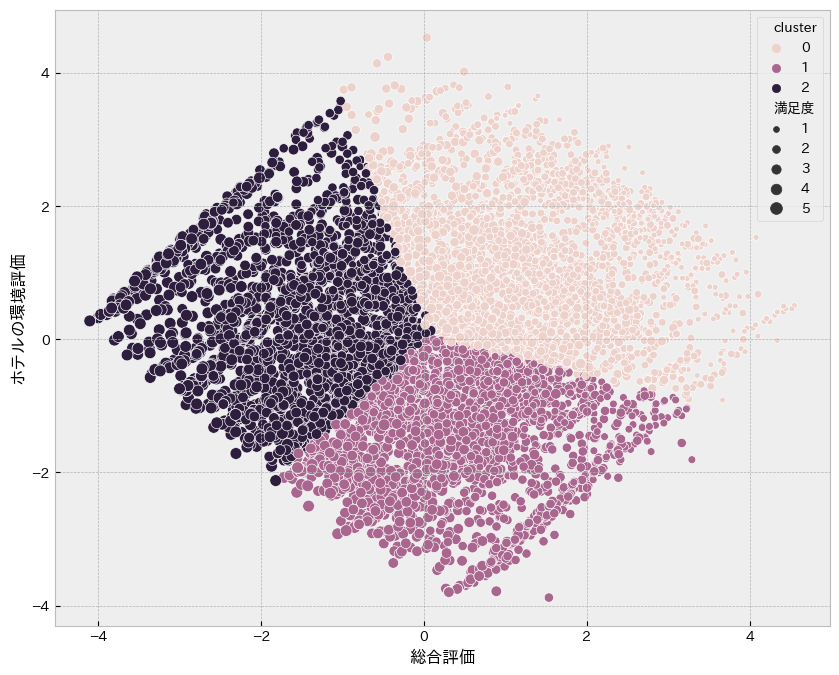

In [ ]:
sns.scatterplot(x='総合評価', y='ホテルの環境評価', hue='cluster', size='満足度', data=new_data);

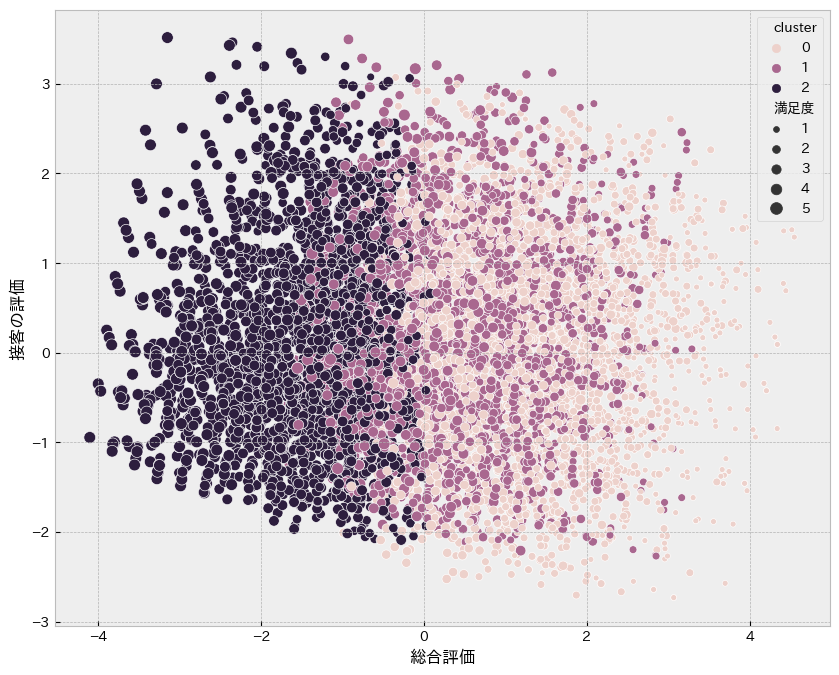

In [ ]:
sns.scatterplot(x='総合評価', y='接客の評価', hue='cluster', size='満足度', data=new_data);

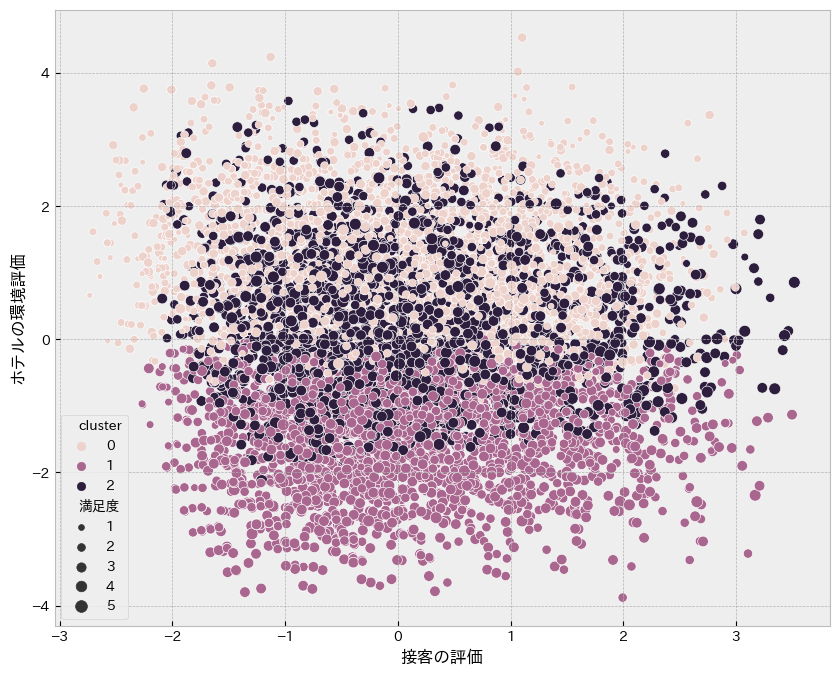

In [ ]:
sns.scatterplot(x='接客の評価', y='ホテルの環境評価', hue='cluster', size='満足度', data=new_data);

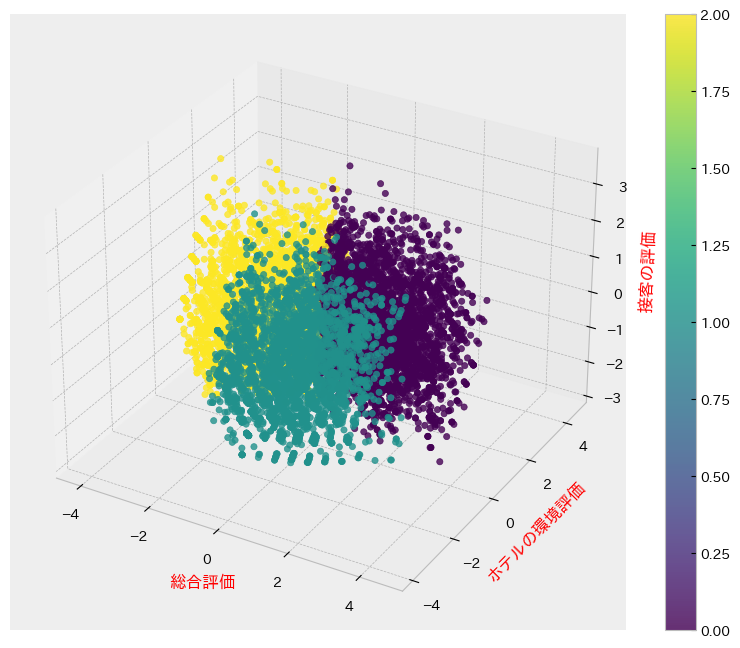

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    new_data['総合評価'],
    new_data['ホテルの環境評価'],
    new_data['接客の評価'],
    alpha=0.8,
    c=list(new_data['cluster'])
)

cbar = fig.colorbar(scatter)

ax.set_xlabel('総合評価', c='r')
ax.set_ylabel('ホテルの環境評価', c='r')
ax.set_zlabel('接客の評価', c='r')

plt.show();